# Задача 5. Экспериментальное исследование алгоритмов для регулярных запросов
## Автор: [toxakaz](https://github.com/toxakaz)

## Теоретическое описание задачи
Пусть имеется размеченный граф $G$, конечный автомат которого допускает регулярный язык $L_G$

Пусть даны множество стартовых состояний графа $V_S$ и множество финишных состояний графа $V_F$.

Пусть имеется регулярное выражение $R$, задающее регулярный язык ограничений $L_R$

Тогда поставленная задача поиска путей в данном графе представима в виде:

$RPQ = \{(v_i, v_j)|\exists\pi:w(v_i\pi v_j)\in L, v_i\in V_S, v_j\in V_F\}$, где $L = L_G\cap L_R$.

## Постановка задачи
Задача посвящена анализу производительности различных реализаций алгоритма решения задач $RPQ$:
- Достижимость между всеми парами вершин
- Достижимость для всего множества заданных вершин
- Достижимость для каждой из заданного множества стартовых вершин

В ходе исследования должны быть даны ответы на следующие вопросы:
- При каких условиях использование специализированных библиотек разреженной линейной алгебры даёт выигрыш в производительности? Для каждой из трёх задач
- Начиная с какого размера стартового множества выгоднее решать задачу для всех пар и выбирать нужные? (При использовании специализированных библиотек)
- На сколько решение второй задачи медленнее решения третьей при одинаковых начальных условиях? (При использовании специализированных библиотек)

Ход исследования:
- Используя [pyCuBool](https://pypi.org/project/pycubool/) реализовать алгоритмы решения задач $RPQ$ и $RPQ_{BFS}$
- Подключить написанные алгоритмы решения задач $RPQ$ и $RPQ_{BFS}$ из Заданий 3, 4
- Сформировать набор данных для экспериментов
- Произвести сравнительный анализ производительности алгоритмов

## Исследуемые решения
Конечные автоматы и графы могут быть представлены в виде множества булевых матриц перехода по указанным меткам.
На практике булевы матрицы часто оказываются существенно разреженными. Сравниваемые решения используют различные представления разреженных булевых матриц, реализованные в библиотеках:
- [pyCuBool](https://pypi.org/project/pycubool/)
- [scipy.sparse](https://docs.scipy.org/doc/scipy/reference/sparse.html)

Библиотека `scipy.sparse` использует `dok` матрицы, а `pycubool` - встроенный класс матрицы, методы которого оптимизированны для использования с GPU.

## Установка и настройка окружения

### Обновление версии python, запущенной в runtime
Исполнить и перезагрузить страницу

In [ ]:
%%capture
!wget -O mini.sh https://repo.anaconda.com/miniconda/Miniconda3-py39_4.12.0-Linux-x86_64.sh
!chmod +x mini.sh
!bash ./mini.sh -b -f -p /usr/local
!conda install -q -y jupyter
!conda install -q -y google-colab -c conda-forge
!python -m ipykernel install --name "py39" --user

### Проверка версии python

Везде должен оказаться python 3.9

Если это не так, исполнить предыдущий блок и перезагрузить страницу.

In [ ]:
!python --version
!pip --version

import sys
print(f"Runtime python version: {sys.version}")

Python 3.9.12
pip 21.2.4 from /usr/local/lib/python3.9/site-packages/pip (python 3.9)
Runtime python version: 3.9.12 (main, Apr  5 2022, 06:56:58) 
[GCC 7.5.0]


### Клонирование репозитория и установка необходимых библиотек

In [ ]:
%%capture
%cd /content
!git clone --branch task_5 https://github.com/toxakaz/formal-language-course.git
%cd /content/formal-language-course
!pip install -r requirements.txt
!pip install pycubool

In [ ]:
!pip install matplotlib
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 5.2 MB/s 
     |████████████████████████████████| 296 kB 71.8 MB/s 
     |████████████████████████████████| 960 kB 70.3 MB/s 
     |████████████████████████████████| 1.6 MB 63.5 MB/s 
     |████████████████████████████████| 3.1 MB 50.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 288 kB 5.1 MB/s 
     |████████████████████████████████| 11.8 MB 64.1 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.1
    Uninstalling matplotlib-3.6.1:
      Successfully uninstalled matplotlib-3.6.1


### Запуск юнит тестов для проверки правильности установки окружения

In [ ]:
!python scripts/run_tests.py

Configure python path:  /env/python;/content/formal-language-course
============================= test session starts ==============================
platform linux -- Python 3.9.12, pytest-7.1.3, pluggy-1.0.0 -- /usr/local/bin/python
cachedir: .pytest_cache
rootdir: /content/formal-language-course
plugins: anyio-3.5.0
collected 26 items                                                             

tests/test_BoolDecomposedNFA.py::test_nfa_to_boolean_matrices PASSED
tests/test_BoolDecomposedNFA.py::test_cross_boolean_matrices PASSED
tests/test_CBBoolDecomposedNFA.py::test_nfa_to_cb_boolean_matrices PASSED
tests/test_CBBoolDecomposedNFA.py::test_cross_cb_boolean_matrices PASSED
tests/test_cb_rpq.py::test_cb_rpq_word_graph PASSED
tests/test_cb_rpq.py::test_cb_rpq_banana_ananas PASSED
tests/test_cb_rpq.py::test_cb_rpq_empty_some PASSED
tests/test_cb_rpq_bfs.py::test_cb_rpq_bfs_banana_ananas PASSED
tests/test_cb_rpq_bfs.py::test_cb_rpq_bfs_separated_banana_ananas PASSED
tests/test_cb_rpq_bf

## Выбор графов для эксперимента
Категории по которым осуществлялась выборка:
- Количество вершин и рёбер в графе
- Отношение количества вершин к количеству рёбер

In [ ]:
from collections import namedtuple

test_graphs = namedtuple(
    "test_graphs", "small_sparse" + " small_filled" + " big_sparse" + " big_filled"
)
graph_names = test_graphs(
    # Графы размером менее 1000 вершин
    [
        # Графы, с преобладанием вершин
        "wc",
        "bzip",
        "pr",
    ],
    [
        # Графы, с преобладанием рёбер
        "generations",
        "univ",
        "atom",
    ],
    # Графы размером более 1000 вершин
    [
        # Графы, с преобладанием вершин
        "gzip",
    ],
    [
        # Графы, с преобладанием рёбер
        "enzyme",
        "go_hierarchy",
    ],
)

graph_names_list = []

for graph_category in graph_names:
  for grapg_name in graph_category:
    graph_names_list.append(grapg_name)

### Вывод характеристик выбранных графов

In [ ]:
'''
from project.utils import get_graph_info_by_name
import pandas as pd

edges = []
nodes = []

for graph in graph_names_list:
    info = get_graph_info_by_name(graph)
    nodes.append(info.number_of_nodes)
    edges.append(info.number_of_edges)

df = pd.DataFrame(
    {
        "Nodes": nodes,
        "Edges": edges,
    },
    index=graph_names_list,
)
df
'''

'\nfrom project.utils import get_graph_info_by_name\nimport pandas as pd\n\nedges = []\nnodes = []\n\nfor graph in graph_names_list:\n    info = get_graph_info_by_name(graph)\n    nodes.append(info.number_of_nodes)\n    edges.append(info.number_of_edges)\n\ndf = pd.DataFrame(\n    {\n        "Nodes": nodes,\n        "Edges": edges,\n    },\n    index=graph_names_list,\n)\ndf\n'

## Регулярные запросы
Все запросы к графам отвечают следующим шаблонам, где $L_i$ — метки графа:
- $(L_0 | L_1)^*\,L_2$
- $(L_0 | L_2)$+ ${L_1}^*$
- ${L_0}^*$+ $(L_1 | L_2)$
- $L_0\,L_1\,L_2\,(L_3 | L_1)^*$
- $(L_0 | L_3)^*\,\,|\,\,(L_1 | L_2)^*$

### Крайний случай
Если в графе число меток меньше числа запросов, тогда метки дополняются уже имеющимися. (В графе должна быть по крайней мере 1 метка, иначе эксперимент не имеет смысла)

In [ ]:
# Генерация регулярных выражений

from pyformlang.regular_expression.regex_objects import Symbol
from pyformlang.regular_expression import Regex


def regex_from_label(label):
    regex = Regex("")
    regex.head = Symbol(str(label))
    return regex


reg_count = 5


def expand(lst, expand_size):
    """
    If number of labels < NUMBER_OF_REGEX, then expand them with existing ones
    """
    expand_length = expand_size - len(lst)
    if expand_length <= 0:
        return lst
    expanded_lst = lst.copy()
    for i in range(expand_length):
        expanded_lst.append(expanded_lst[i])
    return expanded_lst


def regex_first(labels):
    """
    (l0 | l1)* l2
    """
    labels = expand(labels, reg_count)
    regex_0 = regex_from_label(labels[0])
    regex_1 = regex_from_label(labels[1])
    regex_2 = regex_from_label(labels[2])
    return regex_0.union(regex_1).kleene_star().concatenate(regex_2)


def regex_second(labels):
    """
    (l0 | l2) + l1*
    """
    labels = expand(labels, reg_count)
    regex_0 = regex_from_label(labels[0])
    regex_1 = regex_from_label(labels[1])
    regex_2 = regex_from_label(labels[2])
    return regex_0.union(regex_2).union(regex_1.kleene_star())


def regex_third(labels):
    """
    l0* + (L1 | L2)*
    """
    labels = expand(labels, reg_count)
    regex_0 = regex_from_label(labels[0])
    regex_1 = regex_from_label(labels[1])
    regex_2 = regex_from_label(labels[2])
    regex_3 = regex_from_label(labels[3])
    return regex_0.kleene_star().union(regex_1.union(regex_2))


def regex_fourth(labels):
    """
    l0 l1 l2 (l3 | l1)*
    """
    labels = expand(labels, reg_count)
    regex_0 = regex_from_label(labels[0])
    regex_1 = regex_from_label(labels[1])
    regex_2 = regex_from_label(labels[2])
    regex_3 = regex_from_label(labels[3])
    return (
        regex_0.concatenate(regex_1)
        .concatenate(regex_2)
        .concatenate((regex_3.union(regex_1)).kleene_star())
    )


def regex_fifth(labels):
    """
    (l0 | l3)* | (l1 | l2)*
    """
    labels = expand(labels, reg_count)
    regex_0 = regex_from_label(labels[0])
    regex_1 = regex_from_label(labels[1])
    regex_2 = regex_from_label(labels[2])
    regex_3 = regex_from_label(labels[3])
    left_regex = (regex_0.union(regex_3)).kleene_star()
    right_regex = (regex_1.union(regex_2)).kleene_star()
    return left_regex.union(right_regex)


reg_generators = (regex_first, regex_second, regex_third, regex_fourth, regex_fifth)


## Описание эксперимента

### Первый вопрос
`При каких условиях использование специализированных библиотек разреженной линейной алгебры даёт выигрыш в производительности? Для каждой из трёх задач.`

Для ответа на данный вопрос, необходимо выделить основные вычислительно-ёмкие этапы алгоритмов, а так же зависимость скорости их выполнения от характеристик графа.

Очевидно, что самой трудоёмкой задачей во всех трёх алгоритмах RPQ является выполнение вычислений над матрицами. Следовательно, основная характеристика графа, влияющая на скорость выполнения - это размер и наполненность его матриц смежности. Размер матриц зависит от количества вершин, а их наполненность от количества рёбер.

Таким образом, для каждого из трёх алгоритмов, следует проследить за разницой в скорости выполнения алгоритмов, реализованных с помощью `scipy` и `pycubool`, на выбранных графах и за её зависимостью от указанных характеристик.

### Второй вопрос
`Начиная с какого размера стартового множества выгоднее решать задачу для всех пар и выбирать нужные? (При использовании специализированных библиотек)`

Для ответа на данный вопрос необходимо замерить и проанализировать скорость работы решений первой и третьей задач, реализованных с `pycubool`, на выбранных графах и регулярных выражениях при различных размерах стартового множества вершин.

### Третий вопрос
`На сколько решение второй задачи медленнее решения третьей при одинаковых начальных условиях? (При использовании специализированных библиотек)`

Для ответа на данный вопрос необходимо замерить и проанализировать скорость работы решений второй и третьей задаци, реализованных с `pycubool`, на одинаковых графах и регулярных запросах с одинаковыми стартовыми множествами вершин и сравнить результаты.

### Замеры
Таким образом для ответа на поставленные вопросы достаточно провести следующие замеры времени исполнения исследуемых реализаций:

- На выбранных графах и регулярных выражениях с фиксированным множеством стартовых вершин для всех задач и реализаций
- На выбранных графах, регулярных выражениях и различных размерах множества стартовых вершин для реализаций на `pycubool` первой и третьей задач

#### Дополнение
Для маленьких графов время выполнения функции построения $RPQ$ и $RPQ_{BFS}$ для каждого запроса замеряется 5 раз и затем берётся среднее и максимальное. Для больших графов время выполнение функции замеряется единожды для каждого запроса. Данное решение обосновано незначительностью погрешности времени выполнения на больших графах и вычислительными возможностями бесплатного тарифа Google Colab.

Множество финальных вершин влияет на быстродействие всех трёх алгоритмов одинаково: во всех случаях на завершающем этапе достигнутые вершины проверяются на принадлежность к множеству финальных вершин, что происходит через поиск по множеству. Поэтому для упрощения в качестве множества финальных вершин выбиралось всё множество вершин графа.

### Характеристики оборудования

In [ ]:
# Сведения об операционной системе
!cat /etc/os-release

NAME="Ubuntu"
VERSION="18.04.6 LTS (Bionic Beaver)"
ID=ubuntu
ID_LIKE=debian
PRETTY_NAME="Ubuntu 18.04.6 LTS"
VERSION_ID="18.04"
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
VERSION_CODENAME=bionic
UBUNTU_CODENAME=bionic


In [ ]:
# Сведения об используемом CPU
!lscpu | grep 'Model name'
!lscpu | grep 'Socket(s)'
!lscpu | grep 'Core(s) per socket:'
!lscpu | grep 'Thread(s) per core'

Model name:          Intel(R) Xeon(R) CPU @ 2.30GHz
Socket(s):           1
Core(s) per socket:  1
Thread(s) per core:  2


In [ ]:
# Сведения об используемом GPU
!nvidia-smi

Wed Oct 19 18:07:41 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Сведения о размере оперативной памяти системы в GB
!echo 'Total RAM (GB)'
!awk '( $1 == "MemTotal:" ) { print $2/1048576 }' /proc/meminfo

Total RAM (GB)
12.6812


## Подготовка окружения к проведению экспериментов

#### Импорт реализаций алгоритмов RPQ

In [ ]:
from project import (
    rpq_reg_str,
    rpq_bfs_reg_str,
    cb_rpq_reg_str,
    cb_rpq_bfs_reg_str,
)


### Подготовка параметров запросов

#### Описание параметров запуска

In [ ]:
import networkx as nx

# Размер множества стартовых вершин в процентах от количества вершин графа
start_vertices_size = [0.0025, 0.01, 0.0125, 0.015]
size_count = len(start_vertices_size)

# Форма запроса - размер стартового множества и регулярное выражение

# Параметры для замеров с фиксированным множеством стартовых вершин
# Регулярные выражения описанные выше и всё множество вершин в качестве стартового
metaparams_fix = [(0.002, reg) for reg in reg_generators]

# Параметры для замеров с переменным множеством стартовых вершин
# Регулярные выражения описанные выше и процент от количества вершин графа в качестве множества стартовых вершин
metaparams = [(size, reg) for reg in reg_generators for size in start_vertices_size]


In [ ]:
# Описание запросов с фиксированным множеством стартовых вершин
metaparams_fix_desc = [regex.__doc__.strip() for regex in reg_generators]

# Описание запросов с переменным множеством стартовых вершин
metaparams_desc = [
    regex.__doc__.strip() + " " + str(size)
    for regex in reg_generators
    for size in start_vertices_size
]

small_run_number = 5
big_run_number = 1


#### Описание таблиц для хранения результатов

In [ ]:
import pandas as pd

# RPQ (первая задача)
df_rpq_mean_fix_size = pd.DataFrame(index=metaparams_fix_desc, columns=graph_names_list)
df_cb_rpq_mean_fix_size = pd.DataFrame(
    index=metaparams_fix_desc, columns=graph_names_list
)

df_rpq_max_fix_size = pd.DataFrame(index=metaparams_fix_desc, columns=graph_names_list)
df_cb_rpq_max_fix_size = pd.DataFrame(
    index=metaparams_fix_desc, columns=graph_names_list
)

# BFS RPQ вида множество -> множество (вторая задача)
df_bfs_rpq_mean_fix_size = pd.DataFrame(
    index=metaparams_fix_desc, columns=graph_names_list
)
df_bfs_rpq_max_fix_size = pd.DataFrame(
    index=metaparams_fix_desc, columns=graph_names_list
)

df_cb_bfs_rpq_mean_fix_size = pd.DataFrame(
    index=metaparams_fix_desc, columns=graph_names_list
)
df_cb_bfs_rpq_max_fix_size = pd.DataFrame(
    index=metaparams_fix_desc, columns=graph_names_list
)

# BFS RPQ вида вершина -> множество (третья задача)
df_bfs_sep_rpq_mean_fix_size = pd.DataFrame(
    index=metaparams_fix_desc, columns=graph_names_list
)
df_bfs_sep_rpq_max_fix_size = pd.DataFrame(
    index=metaparams_fix_desc, columns=graph_names_list
)

df_cb_bfs_sep_rpq_mean_fix_size = pd.DataFrame(
    index=metaparams_fix_desc, columns=graph_names_list
)
df_cb_bfs_sep_rpq_max_fix_size = pd.DataFrame(
    index=metaparams_fix_desc, columns=graph_names_list
)

# Таблицы для хранения данных о замерах с переменным множеством стартовых вершин
# RPQ (первая задача)
df_cb_rpq_mean = pd.DataFrame(index=metaparams_desc, columns=graph_names_list)
df_cb_rpq_max = pd.DataFrame(index=metaparams_desc, columns=graph_names_list)

# BFS RPQ вида вершина -> множество (третья задача)
df_cb_bfs_sep_rpq_mean = pd.DataFrame(index=metaparams_desc, columns=graph_names_list)
df_cb_bfs_sep_rpq_max = pd.DataFrame(index=metaparams_desc, columns=graph_names_list)


#### Функция для запуска экспериментов

In [ ]:
import time
import cfpq_data

from project.utils import get_graph_info_by_name


def run_and_measure_rpq(
    algo,
    graph_name,
    queries,
    run_number,
    dataframes,
    desc,
    separated=None,
):
    # номер запроса и время выполнения
    measurement_time = {query_index: [] for query_index in range(len(queries))}

    # граф и его характеристики
    graph_info = get_graph_info_by_name(graph_name)
    graph = graph_info.graph
    labels = list(graph_info.labels)

    for _ in range(run_number):
        for query_index, query in enumerate(queries):
            size = query[0]
            regex = query[1]

            # генерация множества стартовых вершин
            v_src = cfpq_data.generate_multiple_source(
                graph, int(graph_info.number_of_nodes * size), seed=42
            )
            print(
                f"Graph: {graph_name}\n Regex: {regex.__doc__}\n Start vertices size: {size * 100}%\n DONE: ",
                end="",
            )
            start_time = end_time = None

            # построение регулярного выражения
            reg_str = str(regex(labels))

            # для первой задачи - просто RPQ
            if separated is None:
                start_time = time.time()
                algo(graph, reg_str, v_src)
                end_time = time.time()

            # для второй и третьей задач - BFS RPQ
            else:
                start_time = time.time()
                algo(graph, reg_str, v_src, separated=separated)
                end_time = time.time()

            measurement_time[query_index].append(end_time - start_time)
            print("OK\n\n")

    for query_index, time_lst in measurement_time.items():
        avg_time = sum(time_lst) / run_number
        dataframes[0].loc[desc[query_index], graph_name] = avg_time
        max_time = max(time_lst)
        dataframes[1].loc[desc[query_index], graph_name] = max_time


## Произведение замеров

### $RPQ$

#### `scipy` fix small

In [ ]:
for graph_name in graph_names.small_sparse + graph_names.small_filled:
    run_and_measure_rpq(
        rpq_reg_str,
        graph_name,
        metaparams_fix,
        small_run_number,
        dataframes=[df_rpq_mean_fix_size, df_rpq_max_fix_size],
        desc=metaparams_fix_desc,
    )


Graph: wc
 Regex: 
    (l0 | l1)* l2
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    (l0 | l2) + l1*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    l0* + (L1 | L2)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    l0 l1 l2 (l3 | l1)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    (l0 | l3)* | (l1 | l2)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    (l0 | l1)* l2
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    (l0 | l2) + l1*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    l0* + (L1 | L2)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    l0 l1 l2 (l3 | l1)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    (l0 | l3)* | (l1 | l2)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    (l0 | l1)* l2
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    (l0 | l2) + l1*
    
 Start vertices size: 0

#### `scipy` fix big

In [ ]:
for graph_name in graph_names.big_sparse + graph_names.big_filled:
    run_and_measure_rpq(
        rpq_reg_str,
        graph_name,
        metaparams_fix,
        big_run_number,
        dataframes=[df_rpq_mean_fix_size, df_rpq_max_fix_size],
        desc=metaparams_fix_desc,
    )
    

Graph: gzip
 Regex: 
    (l0 | l1)* l2
    
 Start vertices size: 0.2%
 DONE: OK


Graph: gzip
 Regex: 
    (l0 | l2) + l1*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: gzip
 Regex: 
    l0* + (L1 | L2)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: gzip
 Regex: 
    l0 l1 l2 (l3 | l1)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: gzip
 Regex: 
    (l0 | l3)* | (l1 | l2)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: enzyme
 Regex: 
    (l0 | l1)* l2
    
 Start vertices size: 0.2%
 DONE: OK


Graph: enzyme
 Regex: 
    (l0 | l2) + l1*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: enzyme
 Regex: 
    l0* + (L1 | L2)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: enzyme
 Regex: 
    l0 l1 l2 (l3 | l1)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: enzyme
 Regex: 
    (l0 | l3)* | (l1 | l2)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: go_hierarchy
 Regex: 
    (l0 | l1)* l2
    
 Start vertices size: 0.2%
 DONE: OK


Graph: go_hierarchy
 Regex:

#### `pycubool` fix small

In [ ]:
for graph_name in graph_names.small_sparse + graph_names.small_filled:
    run_and_measure_rpq(
        cb_rpq_reg_str,
        graph_name,
        metaparams_fix,
        small_run_number,
        dataframes=[df_cb_rpq_mean_fix_size, df_cb_rpq_max_fix_size],
        desc=metaparams_fix_desc,
    )
    

Graph: wc
 Regex: 
    (l0 | l1)* l2
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    (l0 | l2) + l1*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    l0* + (L1 | L2)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    l0 l1 l2 (l3 | l1)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    (l0 | l3)* | (l1 | l2)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    (l0 | l1)* l2
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    (l0 | l2) + l1*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    l0* + (L1 | L2)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    l0 l1 l2 (l3 | l1)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    (l0 | l3)* | (l1 | l2)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    (l0 | l1)* l2
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    (l0 | l2) + l1*
    
 Start vertices size: 0

#### `pycubool` fix big

In [ ]:
for graph_name in graph_names.big_sparse + graph_names.big_filled:
    run_and_measure_rpq(
        cb_rpq_reg_str,
        graph_name,
        metaparams_fix,
        big_run_number,
        dataframes=[df_cb_rpq_mean_fix_size, df_cb_rpq_max_fix_size],
        desc=metaparams_fix_desc,
    )


Graph: gzip
 Regex: 
    (l0 | l1)* l2
    
 Start vertices size: 0.2%
 DONE: OK


Graph: gzip
 Regex: 
    (l0 | l2) + l1*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: gzip
 Regex: 
    l0* + (L1 | L2)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: gzip
 Regex: 
    l0 l1 l2 (l3 | l1)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: gzip
 Regex: 
    (l0 | l3)* | (l1 | l2)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: enzyme
 Regex: 
    (l0 | l1)* l2
    
 Start vertices size: 0.2%
 DONE: OK


Graph: enzyme
 Regex: 
    (l0 | l2) + l1*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: enzyme
 Regex: 
    l0* + (L1 | L2)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: enzyme
 Regex: 
    l0 l1 l2 (l3 | l1)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: enzyme
 Regex: 
    (l0 | l3)* | (l1 | l2)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: go_hierarchy
 Regex: 
    (l0 | l1)* l2
    
 Start vertices size: 0.2%
 DONE: OK


Graph: go_hierarchy
 Regex:

#### `pycubool` small

In [ ]:
for graph_name in graph_names.small_sparse + graph_names.small_filled:
    run_and_measure_rpq(
        cb_rpq_reg_str,
        graph_name,
        metaparams,
        small_run_number,
        dataframes=[df_cb_rpq_mean, df_cb_rpq_max],
        desc=metaparams_desc,
    )


Graph: wc
 Regex: 
    (l0 | l1)* l2
    
 Start vertices size: 0.25%
 DONE: OK


Graph: wc
 Regex: 
    (l0 | l1)* l2
    
 Start vertices size: 1.0%
 DONE: OK


Graph: wc
 Regex: 
    (l0 | l1)* l2
    
 Start vertices size: 1.25%
 DONE: OK


Graph: wc
 Regex: 
    (l0 | l1)* l2
    
 Start vertices size: 1.5%
 DONE: OK


Graph: wc
 Regex: 
    (l0 | l2) + l1*
    
 Start vertices size: 0.25%
 DONE: OK


Graph: wc
 Regex: 
    (l0 | l2) + l1*
    
 Start vertices size: 1.0%
 DONE: OK


Graph: wc
 Regex: 
    (l0 | l2) + l1*
    
 Start vertices size: 1.25%
 DONE: OK


Graph: wc
 Regex: 
    (l0 | l2) + l1*
    
 Start vertices size: 1.5%
 DONE: OK


Graph: wc
 Regex: 
    l0* + (L1 | L2)*
    
 Start vertices size: 0.25%
 DONE: OK


Graph: wc
 Regex: 
    l0* + (L1 | L2)*
    
 Start vertices size: 1.0%
 DONE: OK


Graph: wc
 Regex: 
    l0* + (L1 | L2)*
    
 Start vertices size: 1.25%
 DONE: OK


Graph: wc
 Regex: 
    l0* + (L1 | L2)*
    
 Start vertices size: 1.5%
 DONE: OK


Gr

#### `pycubool` big

In [ ]:
for graph_name in graph_names.big_sparse + graph_names.big_filled:
    run_and_measure_rpq(
        cb_rpq_reg_str,
        graph_name,
        metaparams,
        big_run_number,
        dataframes=[df_cb_rpq_mean, df_cb_rpq_max],
        desc=metaparams_desc,
    )


Graph: gzip
 Regex: 
    (l0 | l1)* l2
    
 Start vertices size: 0.25%
 DONE: OK


Graph: gzip
 Regex: 
    (l0 | l1)* l2
    
 Start vertices size: 1.0%
 DONE: OK


Graph: gzip
 Regex: 
    (l0 | l1)* l2
    
 Start vertices size: 1.25%
 DONE: OK


Graph: gzip
 Regex: 
    (l0 | l1)* l2
    
 Start vertices size: 1.5%
 DONE: OK


Graph: gzip
 Regex: 
    (l0 | l2) + l1*
    
 Start vertices size: 0.25%
 DONE: OK


Graph: gzip
 Regex: 
    (l0 | l2) + l1*
    
 Start vertices size: 1.0%
 DONE: OK


Graph: gzip
 Regex: 
    (l0 | l2) + l1*
    
 Start vertices size: 1.25%
 DONE: OK


Graph: gzip
 Regex: 
    (l0 | l2) + l1*
    
 Start vertices size: 1.5%
 DONE: OK


Graph: gzip
 Regex: 
    l0* + (L1 | L2)*
    
 Start vertices size: 0.25%
 DONE: OK


Graph: gzip
 Regex: 
    l0* + (L1 | L2)*
    
 Start vertices size: 1.0%
 DONE: OK


Graph: gzip
 Regex: 
    l0* + (L1 | L2)*
    
 Start vertices size: 1.25%
 DONE: OK


Graph: gzip
 Regex: 
    l0* + (L1 | L2)*
    
 Start vertices s

### $RPQ_{BFS}$

#### `scipy` fix small

In [ ]:
for graph_name in graph_names.small_sparse + graph_names.small_filled:
    run_and_measure_rpq(
        rpq_bfs_reg_str,
        graph_name,
        metaparams_fix,
        small_run_number,
        dataframes=[df_bfs_rpq_mean_fix_size, df_bfs_rpq_max_fix_size],
        desc=metaparams_fix_desc,
    )


Graph: wc
 Regex: 
    (l0 | l1)* l2
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    (l0 | l2) + l1*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    l0* + (L1 | L2)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    l0 l1 l2 (l3 | l1)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    (l0 | l3)* | (l1 | l2)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    (l0 | l1)* l2
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    (l0 | l2) + l1*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    l0* + (L1 | L2)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    l0 l1 l2 (l3 | l1)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    (l0 | l3)* | (l1 | l2)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    (l0 | l1)* l2
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    (l0 | l2) + l1*
    
 Start vertices size: 0

#### `scipy` fix big

In [ ]:
for graph_name in graph_names.big_sparse + graph_names.big_filled:
    run_and_measure_rpq(
        rpq_bfs_reg_str,
        graph_name,
        metaparams_fix,
        big_run_number,
        dataframes=[df_bfs_rpq_mean_fix_size, df_bfs_rpq_max_fix_size],
        desc=metaparams_fix_desc,
    )


Graph: gzip
 Regex: 
    (l0 | l1)* l2
    
 Start vertices size: 0.2%
 DONE: OK


Graph: gzip
 Regex: 
    (l0 | l2) + l1*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: gzip
 Regex: 
    l0* + (L1 | L2)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: gzip
 Regex: 
    l0 l1 l2 (l3 | l1)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: gzip
 Regex: 
    (l0 | l3)* | (l1 | l2)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: enzyme
 Regex: 
    (l0 | l1)* l2
    
 Start vertices size: 0.2%
 DONE: OK


Graph: enzyme
 Regex: 
    (l0 | l2) + l1*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: enzyme
 Regex: 
    l0* + (L1 | L2)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: enzyme
 Regex: 
    l0 l1 l2 (l3 | l1)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: enzyme
 Regex: 
    (l0 | l3)* | (l1 | l2)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: go_hierarchy
 Regex: 
    (l0 | l1)* l2
    
 Start vertices size: 0.2%
 DONE: OK


Graph: go_hierarchy
 Regex:

#### `pycubool` fix small

In [ ]:
for graph_name in graph_names.small_sparse + graph_names.small_filled:
    run_and_measure_rpq(
        cb_rpq_bfs_reg_str,
        graph_name,
        metaparams_fix,
        small_run_number,
        dataframes=[df_cb_bfs_rpq_mean_fix_size, df_cb_bfs_rpq_max_fix_size],
        desc=metaparams_fix_desc,
    )
    

Graph: wc
 Regex: 
    (l0 | l1)* l2
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    (l0 | l2) + l1*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    l0* + (L1 | L2)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    l0 l1 l2 (l3 | l1)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    (l0 | l3)* | (l1 | l2)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    (l0 | l1)* l2
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    (l0 | l2) + l1*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    l0* + (L1 | L2)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    l0 l1 l2 (l3 | l1)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    (l0 | l3)* | (l1 | l2)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    (l0 | l1)* l2
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    (l0 | l2) + l1*
    
 Start vertices size: 0

#### `pycubool` fix big

In [ ]:
for graph_name in graph_names.big_sparse + graph_names.big_filled:
    run_and_measure_rpq(
        cb_rpq_bfs_reg_str,
        graph_name,
        metaparams_fix,
        big_run_number,
        dataframes=[df_cb_bfs_rpq_mean_fix_size, df_cb_bfs_rpq_max_fix_size],
        desc=metaparams_fix_desc,
    )


Graph: gzip
 Regex: 
    (l0 | l1)* l2
    
 Start vertices size: 0.2%
 DONE: OK


Graph: gzip
 Regex: 
    (l0 | l2) + l1*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: gzip
 Regex: 
    l0* + (L1 | L2)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: gzip
 Regex: 
    l0 l1 l2 (l3 | l1)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: gzip
 Regex: 
    (l0 | l3)* | (l1 | l2)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: enzyme
 Regex: 
    (l0 | l1)* l2
    
 Start vertices size: 0.2%
 DONE: OK


Graph: enzyme
 Regex: 
    (l0 | l2) + l1*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: enzyme
 Regex: 
    l0* + (L1 | L2)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: enzyme
 Regex: 
    l0 l1 l2 (l3 | l1)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: enzyme
 Regex: 
    (l0 | l3)* | (l1 | l2)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: go_hierarchy
 Regex: 
    (l0 | l1)* l2
    
 Start vertices size: 0.2%
 DONE: OK


Graph: go_hierarchy
 Regex:

### $RPQ_{BFS} sep$

#### `scipy` fix small

In [ ]:
for graph_name in graph_names.small_sparse + graph_names.small_filled:
    run_and_measure_rpq(
        rpq_bfs_reg_str,
        graph_name,
        metaparams_fix,
        small_run_number,
        dataframes=[df_bfs_sep_rpq_mean_fix_size, df_bfs_sep_rpq_max_fix_size],
        desc=metaparams_fix_desc,
        separated=True,
    )


Graph: wc
 Regex: 
    (l0 | l1)* l2
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    (l0 | l2) + l1*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    l0* + (L1 | L2)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    l0 l1 l2 (l3 | l1)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    (l0 | l3)* | (l1 | l2)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    (l0 | l1)* l2
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    (l0 | l2) + l1*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    l0* + (L1 | L2)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    l0 l1 l2 (l3 | l1)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    (l0 | l3)* | (l1 | l2)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    (l0 | l1)* l2
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    (l0 | l2) + l1*
    
 Start vertices size: 0

#### `scipy` fix big

In [ ]:
for graph_name in graph_names.big_sparse + graph_names.big_filled:
    run_and_measure_rpq(
        rpq_bfs_reg_str,
        graph_name,
        metaparams_fix,
        big_run_number,
        dataframes=[df_bfs_sep_rpq_mean_fix_size, df_bfs_sep_rpq_max_fix_size],
        desc=metaparams_fix_desc,
        separated=True,
    )


Graph: gzip
 Regex: 
    (l0 | l1)* l2
    
 Start vertices size: 0.2%
 DONE: OK


Graph: gzip
 Regex: 
    (l0 | l2) + l1*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: gzip
 Regex: 
    l0* + (L1 | L2)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: gzip
 Regex: 
    l0 l1 l2 (l3 | l1)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: gzip
 Regex: 
    (l0 | l3)* | (l1 | l2)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: enzyme
 Regex: 
    (l0 | l1)* l2
    
 Start vertices size: 0.2%
 DONE: OK


Graph: enzyme
 Regex: 
    (l0 | l2) + l1*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: enzyme
 Regex: 
    l0* + (L1 | L2)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: enzyme
 Regex: 
    l0 l1 l2 (l3 | l1)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: enzyme
 Regex: 
    (l0 | l3)* | (l1 | l2)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: go_hierarchy
 Regex: 
    (l0 | l1)* l2
    
 Start vertices size: 0.2%
 DONE: OK


Graph: go_hierarchy
 Regex:

#### `pycubool` fix small

In [ ]:
for graph_name in graph_names.small_sparse + graph_names.small_filled:
    run_and_measure_rpq(
        cb_rpq_bfs_reg_str,
        graph_name,
        metaparams_fix,
        small_run_number,
        dataframes=[df_cb_bfs_sep_rpq_mean_fix_size, df_cb_bfs_sep_rpq_max_fix_size],
        desc=metaparams_fix_desc,
        separated=True,
    )


Graph: wc
 Regex: 
    (l0 | l1)* l2
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    (l0 | l2) + l1*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    l0* + (L1 | L2)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    l0 l1 l2 (l3 | l1)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    (l0 | l3)* | (l1 | l2)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    (l0 | l1)* l2
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    (l0 | l2) + l1*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    l0* + (L1 | L2)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    l0 l1 l2 (l3 | l1)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    (l0 | l3)* | (l1 | l2)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    (l0 | l1)* l2
    
 Start vertices size: 0.2%
 DONE: OK


Graph: wc
 Regex: 
    (l0 | l2) + l1*
    
 Start vertices size: 0

#### `pycubool` fix big

In [ ]:
for graph_name in graph_names.big_sparse + graph_names.big_filled:
    run_and_measure_rpq(
        cb_rpq_bfs_reg_str,
        graph_name,
        metaparams_fix,
        big_run_number,
        dataframes=[df_cb_bfs_sep_rpq_mean_fix_size, df_cb_bfs_sep_rpq_max_fix_size],
        desc=metaparams_fix_desc,
        separated=True,
    )


Graph: gzip
 Regex: 
    (l0 | l1)* l2
    
 Start vertices size: 0.2%
 DONE: OK


Graph: gzip
 Regex: 
    (l0 | l2) + l1*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: gzip
 Regex: 
    l0* + (L1 | L2)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: gzip
 Regex: 
    l0 l1 l2 (l3 | l1)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: gzip
 Regex: 
    (l0 | l3)* | (l1 | l2)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: enzyme
 Regex: 
    (l0 | l1)* l2
    
 Start vertices size: 0.2%
 DONE: OK


Graph: enzyme
 Regex: 
    (l0 | l2) + l1*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: enzyme
 Regex: 
    l0* + (L1 | L2)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: enzyme
 Regex: 
    l0 l1 l2 (l3 | l1)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: enzyme
 Regex: 
    (l0 | l3)* | (l1 | l2)*
    
 Start vertices size: 0.2%
 DONE: OK


Graph: go_hierarchy
 Regex: 
    (l0 | l1)* l2
    
 Start vertices size: 0.2%
 DONE: OK


Graph: go_hierarchy
 Regex:

#### `pycubool` small

In [ ]:
for graph_name in graph_names.small_sparse + graph_names.small_filled:
    run_and_measure_rpq(
        cb_rpq_bfs_reg_str,
        graph_name,
        metaparams,
        small_run_number,
        dataframes=[df_cb_bfs_sep_rpq_mean, df_cb_rpq_max],
        desc=metaparams_desc,
        separated=True,
    )


Graph: wc
 Regex: 
    (l0 | l1)* l2
    
 Start vertices size: 0.25%
 DONE: OK


Graph: wc
 Regex: 
    (l0 | l1)* l2
    
 Start vertices size: 1.0%
 DONE: OK


Graph: wc
 Regex: 
    (l0 | l1)* l2
    
 Start vertices size: 1.25%
 DONE: OK


Graph: wc
 Regex: 
    (l0 | l1)* l2
    
 Start vertices size: 1.5%
 DONE: OK


Graph: wc
 Regex: 
    (l0 | l2) + l1*
    
 Start vertices size: 0.25%
 DONE: OK


Graph: wc
 Regex: 
    (l0 | l2) + l1*
    
 Start vertices size: 1.0%
 DONE: OK


Graph: wc
 Regex: 
    (l0 | l2) + l1*
    
 Start vertices size: 1.25%
 DONE: OK


Graph: wc
 Regex: 
    (l0 | l2) + l1*
    
 Start vertices size: 1.5%
 DONE: OK


Graph: wc
 Regex: 
    l0* + (L1 | L2)*
    
 Start vertices size: 0.25%
 DONE: OK


Graph: wc
 Regex: 
    l0* + (L1 | L2)*
    
 Start vertices size: 1.0%
 DONE: OK


Graph: wc
 Regex: 
    l0* + (L1 | L2)*
    
 Start vertices size: 1.25%
 DONE: OK


Graph: wc
 Regex: 
    l0* + (L1 | L2)*
    
 Start vertices size: 1.5%
 DONE: OK


Gr

#### `pycubool` big

In [ ]:
for graph_name in graph_names.big_sparse + graph_names.big_filled:
    run_and_measure_rpq(
        cb_rpq_bfs_reg_str,
        graph_name,
        metaparams,
        big_run_number,
        dataframes=[df_cb_bfs_sep_rpq_mean, df_cb_rpq_max],
        desc=metaparams_desc,
        separated=True,
    )


Graph: gzip
 Regex: 
    (l0 | l1)* l2
    
 Start vertices size: 0.25%
 DONE: OK


Graph: gzip
 Regex: 
    (l0 | l1)* l2
    
 Start vertices size: 1.0%
 DONE: OK


Graph: gzip
 Regex: 
    (l0 | l1)* l2
    
 Start vertices size: 1.25%
 DONE: OK


Graph: gzip
 Regex: 
    (l0 | l1)* l2
    
 Start vertices size: 1.5%
 DONE: OK


Graph: gzip
 Regex: 
    (l0 | l2) + l1*
    
 Start vertices size: 0.25%
 DONE: OK


Graph: gzip
 Regex: 
    (l0 | l2) + l1*
    
 Start vertices size: 1.0%
 DONE: OK


Graph: gzip
 Regex: 
    (l0 | l2) + l1*
    
 Start vertices size: 1.25%
 DONE: OK


Graph: gzip
 Regex: 
    (l0 | l2) + l1*
    
 Start vertices size: 1.5%
 DONE: OK


Graph: gzip
 Regex: 
    l0* + (L1 | L2)*
    
 Start vertices size: 0.25%
 DONE: OK


Graph: gzip
 Regex: 
    l0* + (L1 | L2)*
    
 Start vertices size: 1.0%
 DONE: OK


Graph: gzip
 Regex: 
    l0* + (L1 | L2)*
    
 Start vertices size: 1.25%
 DONE: OK


Graph: gzip
 Regex: 
    l0* + (L1 | L2)*
    
 Start vertices s

## Вывод таблиц

### $RPQ$

#### `scipy` fix

In [ ]:
df_rpq_mean_fix_size

,wc,bzip,pr,generations,univ,atom,gzip,enzyme,go_hierarchy
(l0 | l1)* l2,0.026499,0.03889,0.059009,0.021298,0.020676,0.03,0.224759,5.4701,23.707413
(l0 | l2) + l1*,0.025103,0.048036,0.049018,0.019819,0.033142,0.029968,0.155059,5.573064,19.664121
l0* + (L1 | L2)*,0.027698,0.037751,0.064023,0.018538,0.020049,0.042199,0.154022,5.635509,23.32251
l0 l1 l2 (l3 | l1)*,0.02634,0.037909,0.063789,0.018886,0.022199,0.030979,0.232644,5.738961,19.416012
(l0 | l3)* | (l1 | l2)*,0.027754,0.051708,0.059121,0.020109,0.022013,0.030664,0.142663,5.533414,18.813416


In [ ]:
df_rpq_max_fix_size

,wc,bzip,pr,generations,univ,atom,gzip,enzyme,go_hierarchy
(l0 | l1)* l2,0.028339,0.041165,0.108277,0.027775,0.021777,0.034705,0.224759,5.4701,23.707413
(l0 | l2) + l1*,0.025919,0.09607,0.057802,0.021804,0.085572,0.030892,0.155059,5.573064,19.664121
l0* + (L1 | L2)*,0.029783,0.041825,0.124074,0.019699,0.020415,0.093181,0.154022,5.635509,23.32251
l0 l1 l2 (l3 | l1)*,0.030759,0.039613,0.11812,0.020106,0.029313,0.033211,0.232644,5.738961,19.416012
(l0 | l3)* | (l1 | l2)*,0.032205,0.100871,0.112041,0.020874,0.023561,0.033983,0.142663,5.533414,18.813416


#### `pycubool` fix

In [ ]:
df_cb_rpq_mean_fix_size

,wc,bzip,pr,generations,univ,atom,gzip,enzyme,go_hierarchy
(l0 | l1)* l2,0.064743,0.033951,0.04395,0.018274,0.017601,0.021834,0.188387,4.687713,14.623313
(l0 | l2) + l1*,0.020673,0.033977,0.042107,0.017747,0.017771,0.0221,0.19659,4.69832,14.421339
l0* + (L1 | L2)*,0.020494,0.03294,0.042052,0.017852,0.016525,0.022838,0.128874,4.952173,14.642609
l0 l1 l2 (l3 | l1)*,0.02146,0.034142,0.0423,0.020429,0.019389,0.024924,0.207164,4.93859,15.221747
(l0 | l3)* | (l1 | l2)*,0.020354,0.031465,0.041833,0.019727,0.01869,0.025387,0.210418,4.7583,18.757524


In [ ]:
df_cb_rpq_max_fix_size

,wc,bzip,pr,generations,univ,atom,gzip,enzyme,go_hierarchy
(l0 | l1)* l2,0.241068,0.037998,0.04629,0.022405,0.018265,0.022728,0.188387,4.687713,14.623313
(l0 | l2) + l1*,0.024214,0.044528,0.047167,0.018399,0.021855,0.022726,0.19659,4.69832,14.421339
l0* + (L1 | L2)*,0.021486,0.035887,0.044721,0.022185,0.017101,0.024466,0.128874,4.952173,14.642609
l0 l1 l2 (l3 | l1)*,0.026815,0.038115,0.046446,0.024198,0.021074,0.030919,0.207164,4.93859,15.221747
(l0 | l3)* | (l1 | l2)*,0.020943,0.031982,0.047193,0.021255,0.019306,0.028779,0.210418,4.7583,18.757524


#### `pycubool`

In [ ]:
df_cb_rpq_mean

,wc,bzip,pr,generations,univ,atom,gzip,enzyme,go_hierarchy
(l0 | l1)* l2 0.0025,0.023588,0.035085,0.045609,0.032204,0.018071,0.022619,0.194703,4.457523,14.84372
(l0 | l1)* l2 0.01,0.021666,0.032989,0.055034,0.016174,0.017057,0.02072,0.189384,5.909513,14.542139
(l0 | l1)* l2 0.0125,0.021083,0.035305,0.041792,0.015968,0.016357,0.020818,0.123059,7.078529,14.456856
(l0 | l1)* l2 0.015,0.02088,0.032962,0.051801,0.015951,0.015983,0.022425,0.184724,4.980589,14.600177
(l0 | l2) + l1* 0.0025,0.020167,0.045552,0.039261,0.018722,0.028436,0.024808,0.115394,4.606864,15.542206
(l0 | l2) + l1* 0.01,0.01928,0.032016,0.065811,0.017045,0.016618,0.022706,0.18246,4.525723,17.728537
(l0 | l2) + l1* 0.0125,0.019704,0.046245,0.040615,0.0169,0.015571,0.021676,0.189203,4.693227,13.912837
(l0 | l2) + l1* 0.015,0.018433,0.04448,0.052252,0.01628,0.016425,0.035751,0.120297,4.529678,18.261779
l0* + (L1 | L2)* 0.0025,0.021125,0.032455,0.053813,0.01719,0.016426,0.022548,0.193722,4.589909,14.762055
l0* + (L1 | L2)* 0.01,0.019291,0.032253,0.041284,0.017728,0.015498,0.021931,0.132981,4.654022,13.853025


In [ ]:
df_cb_rpq_max

,wc,bzip,pr,generations,univ,atom,gzip,enzyme,go_hierarchy
(l0 | l1)* l2 0.0025,3.830479,0.108233,0.139234,1.976399,2.767472,3.11314,0.240332,7.450107,16.778994
(l0 | l1)* l2 0.01,0.043977,0.083412,0.137274,0.043726,0.037383,0.040574,0.37403,10.184202,17.364719
(l0 | l1)* l2 0.0125,0.050328,0.092289,0.236001,0.045241,0.048811,0.053132,0.514587,13.240497,17.208818
(l0 | l1)* l2 0.015,0.049264,0.178875,0.263592,0.04377,0.049844,0.060909,0.515752,15.947994,18.086017
(l0 | l2) + l1* 0.0025,2.498206,0.041996,0.051959,1.79075,1.957093,2.796765,0.214146,5.469827,15.590874
(l0 | l2) + l1* 0.01,0.036897,0.071526,0.150019,0.039684,0.024247,0.036827,0.299211,9.848865,16.737007
(l0 | l2) + l1* 0.0125,0.041996,0.080479,0.173081,0.039356,0.032413,0.102445,0.356942,10.939085,17.320183
(l0 | l2) + l1* 0.015,0.041517,0.153638,0.124179,0.039541,0.034623,0.06224,0.455571,12.066349,17.978839
l0* + (L1 | L2)* 0.0025,2.688909,0.097291,0.114204,1.81708,1.718682,2.752512,0.145668,5.52476,15.254348
l0* + (L1 | L2)* 0.01,0.03948,0.077403,0.099187,0.036292,0.024816,0.039951,0.40796,8.875511,21.712955


### $RPQ_{BFS}$

#### `scipy` fix

In [ ]:
df_bfs_rpq_mean_fix_size

,wc,bzip,pr,generations,univ,atom,gzip,enzyme,go_hierarchy
(l0 | l1)* l2,0.046568,0.057744,0.0605,0.031227,0.03282,0.044649,0.321563,10.82201,18.070812
(l0 | l2) + l1*,0.057749,0.042579,0.056076,0.035054,0.038414,0.053944,0.160014,6.67636,18.332637
l0* + (L1 | L2)*,0.059844,0.044908,0.068602,0.032703,0.036524,0.064123,0.234657,5.67988,18.616789
l0 l1 l2 (l3 | l1)*,0.060584,0.047197,0.063631,0.050481,0.04162,0.056094,0.181958,6.053092,18.198108
(l0 | l3)* | (l1 | l2)*,0.040752,0.052888,0.06963,0.038292,0.040703,0.056479,0.284368,6.790261,18.161241


In [ ]:
df_bfs_rpq_max_fix_size

,wc,bzip,pr,generations,univ,atom,gzip,enzyme,go_hierarchy
(l0 | l1)* l2,0.050638,0.058671,0.062746,0.035554,0.036906,0.047122,0.321563,10.82201,18.070812
(l0 | l2) + l1*,0.061361,0.043973,0.059271,0.03934,0.040553,0.056845,0.160014,6.67636,18.332637
l0* + (L1 | L2)*,0.064984,0.047435,0.122083,0.034878,0.038685,0.112562,0.234657,5.67988,18.616789
l0 l1 l2 (l3 | l1)*,0.063446,0.052124,0.067687,0.097502,0.046057,0.064219,0.181958,6.053092,18.198108
(l0 | l3)* | (l1 | l2)*,0.042305,0.059912,0.122655,0.045228,0.04305,0.059398,0.284368,6.790261,18.161241


#### `pycubool` fix

In [ ]:
df_cb_bfs_rpq_mean_fix_size

,wc,bzip,pr,generations,univ,atom,gzip,enzyme,go_hierarchy
(l0 | l1)* l2,0.028163,0.039496,0.04333,0.026349,0.026706,0.032477,0.133323,4.166593,18.531251
(l0 | l2) + l1*,0.025663,0.032953,0.056174,0.02543,0.027916,0.04453,0.177676,4.346851,14.838083
l0* + (L1 | L2)*,0.026629,0.035719,0.043175,0.027011,0.038476,0.030117,0.118035,4.207417,19.761817
l0 l1 l2 (l3 | l1)*,0.033318,0.038955,0.045815,0.03227,0.033976,0.038367,0.18309,4.238213,14.246151
(l0 | l3)* | (l1 | l2)*,0.021329,0.037648,0.05719,0.033067,0.031589,0.037914,0.128439,4.204565,14.503795


In [ ]:
df_cb_bfs_rpq_max_fix_size

,wc,bzip,pr,generations,univ,atom,gzip,enzyme,go_hierarchy
(l0 | l1)* l2,0.030581,0.041457,0.044412,0.026792,0.029272,0.035609,0.133323,4.166593,18.531251
(l0 | l2) + l1*,0.02689,0.035613,0.116464,0.02617,0.030562,0.09812,0.177676,4.346851,14.838083
l0* + (L1 | L2)*,0.028352,0.038403,0.04396,0.030894,0.085772,0.030514,0.118035,4.207417,19.761817
l0 l1 l2 (l3 | l1)*,0.036811,0.04343,0.0497,0.032669,0.036196,0.040339,0.18309,4.238213,14.246151
(l0 | l3)* | (l1 | l2)*,0.021879,0.039229,0.11023,0.035965,0.033354,0.040258,0.128439,4.204565,14.503795


### $RPQ_{BFS}sep$

#### `scipy` fix

In [ ]:
df_bfs_sep_rpq_mean_fix_size

,wc,bzip,pr,generations,univ,atom,gzip,enzyme,go_hierarchy
(l0 | l1)* l2,4.260213,0.054412,0.057486,1.236287,1.811171,3.374667,0.445855,77.021649,38.283938
(l0 | l2) + l1*,2.148042,0.040905,0.067491,0.997086,1.34412,2.740016,0.305599,61.22784,37.254348
l0* + (L1 | L2)*,2.278876,0.043899,0.052473,0.918674,1.488442,2.459592,0.246187,45.429447,38.599806
l0 l1 l2 (l3 | l1)*,3.092647,0.045408,0.060735,1.562614,2.596355,3.929707,0.349575,56.466888,70.096996
(l0 | l3)* | (l1 | l2)*,2.748584,0.053255,0.065965,1.767297,2.539328,3.968035,0.290945,111.837844,37.671977


In [ ]:
df_bfs_sep_rpq_max_fix_size

,wc,bzip,pr,generations,univ,atom,gzip,enzyme,go_hierarchy
(l0 | l1)* l2,4.376455,0.05721,0.060305,1.266965,2.455107,5.194969,0.445855,77.021649,38.283938
(l0 | l2) + l1*,2.172918,0.042217,0.133857,1.070385,1.507699,4.23059,0.305599,61.22784,37.254348
l0* + (L1 | L2)*,2.300627,0.045204,0.056031,0.946611,2.224211,2.939981,0.246187,45.429447,38.599806
l0 l1 l2 (l3 | l1)*,3.103625,0.050085,0.068261,1.600636,4.031552,3.940084,0.349575,56.466888,70.096996
(l0 | l3)* | (l1 | l2)*,2.774518,0.058193,0.117693,1.802436,3.847352,3.994016,0.290945,111.837844,37.671977


#### `pycubool` fix

In [ ]:
df_cb_bfs_sep_rpq_mean_fix_size

,wc,bzip,pr,generations,univ,atom,gzip,enzyme,go_hierarchy
(l0 | l1)* l2,3.793771,0.040646,0.05595,1.751789,2.138093,3.031563,0.177541,5.533848,19.09117
(l0 | l2) + l1*,2.48082,0.056031,0.040981,1.464535,1.725465,2.772691,0.210166,5.088893,16.75819
l0* + (L1 | L2)*,2.603225,0.036207,0.055131,1.355153,1.73457,2.697862,0.139299,5.075379,18.4924
l0 l1 l2 (l3 | l1)*,3.474084,0.049174,0.047767,2.420509,3.325391,5.003295,0.220268,5.736886,15.34456
(l0 | l3)* | (l1 | l2)*,2.863427,0.039274,0.053087,2.520619,2.848068,4.272082,0.146977,5.960823,14.626637


In [ ]:
df_cb_bfs_sep_rpq_max_fix_size

,wc,bzip,pr,generations,univ,atom,gzip,enzyme,go_hierarchy
(l0 | l1)* l2,3.829381,0.047724,0.11239,2.263838,2.754327,3.04012,0.177541,5.533848,19.09117
(l0 | l2) + l1*,2.525455,0.091981,0.041834,1.621339,1.739086,2.83375,0.210166,5.088893,16.75819
l0* + (L1 | L2)*,2.621184,0.038273,0.107715,1.717094,1.981887,2.725122,0.139299,5.075379,18.4924
l0 l1 l2 (l3 | l1)*,3.493727,0.094581,0.051286,3.186412,4.307333,5.034827,0.220268,5.736886,15.34456
(l0 | l3)* | (l1 | l2)*,2.896033,0.040378,0.098131,3.266262,3.677053,4.323635,0.146977,5.960823,14.626637


#### `pycubool`

In [ ]:
df_cb_bfs_sep_rpq_mean

,wc,bzip,pr,generations,univ,atom,gzip,enzyme,go_hierarchy
(l0 | l1)* l2 0.0025,3.811418,0.054118,0.095349,1.707967,2.14252,3.056568,0.240332,7.450107,16.778994
(l0 | l1)* l2 0.01,0.040822,0.082107,0.13476,0.032054,0.027691,0.039256,0.37403,10.184202,17.364719
(l0 | l1)* l2 0.0125,0.048099,0.091516,0.179409,0.031807,0.037233,0.049176,0.514587,13.240497,17.208818
(l0 | l1)* l2 0.015,0.047309,0.129766,0.216071,0.031569,0.036977,0.058092,0.515752,15.947994,18.086017
(l0 | l2) + l1* 0.0025,2.486284,0.035734,0.050065,1.469958,1.783315,2.775889,0.214146,5.469827,15.590874
(l0 | l2) + l1* 0.01,0.035535,0.069197,0.103746,0.029284,0.022897,0.03644,0.299211,9.848865,16.737007
(l0 | l2) + l1* 0.0125,0.040692,0.076467,0.123739,0.028494,0.031041,0.05594,0.356942,10.939085,17.320183
(l0 | l2) + l1* 0.015,0.040737,0.103158,0.122052,0.028477,0.031932,0.054785,0.455571,12.066349,17.978839
l0* + (L1 | L2)* 0.0025,2.635625,0.049127,0.06475,1.437241,1.696772,2.731467,0.145668,5.52476,15.254348
l0* + (L1 | L2)* 0.01,0.036719,0.074112,0.094908,0.028336,0.02335,0.037326,0.40796,8.875511,21.712955


In [ ]:
df_cb_bfs_sep_rpq_max

,wc,bzip,pr,generations,univ,atom,gzip,enzyme,go_hierarchy
(l0 | l1)* l2 0.0025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(l0 | l1)* l2 0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(l0 | l1)* l2 0.0125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(l0 | l1)* l2 0.015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(l0 | l2) + l1* 0.0025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(l0 | l2) + l1* 0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(l0 | l2) + l1* 0.0125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(l0 | l2) + l1* 0.015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l0* + (L1 | L2)* 0.0025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l0* + (L1 | L2)* 0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Вывод графиков

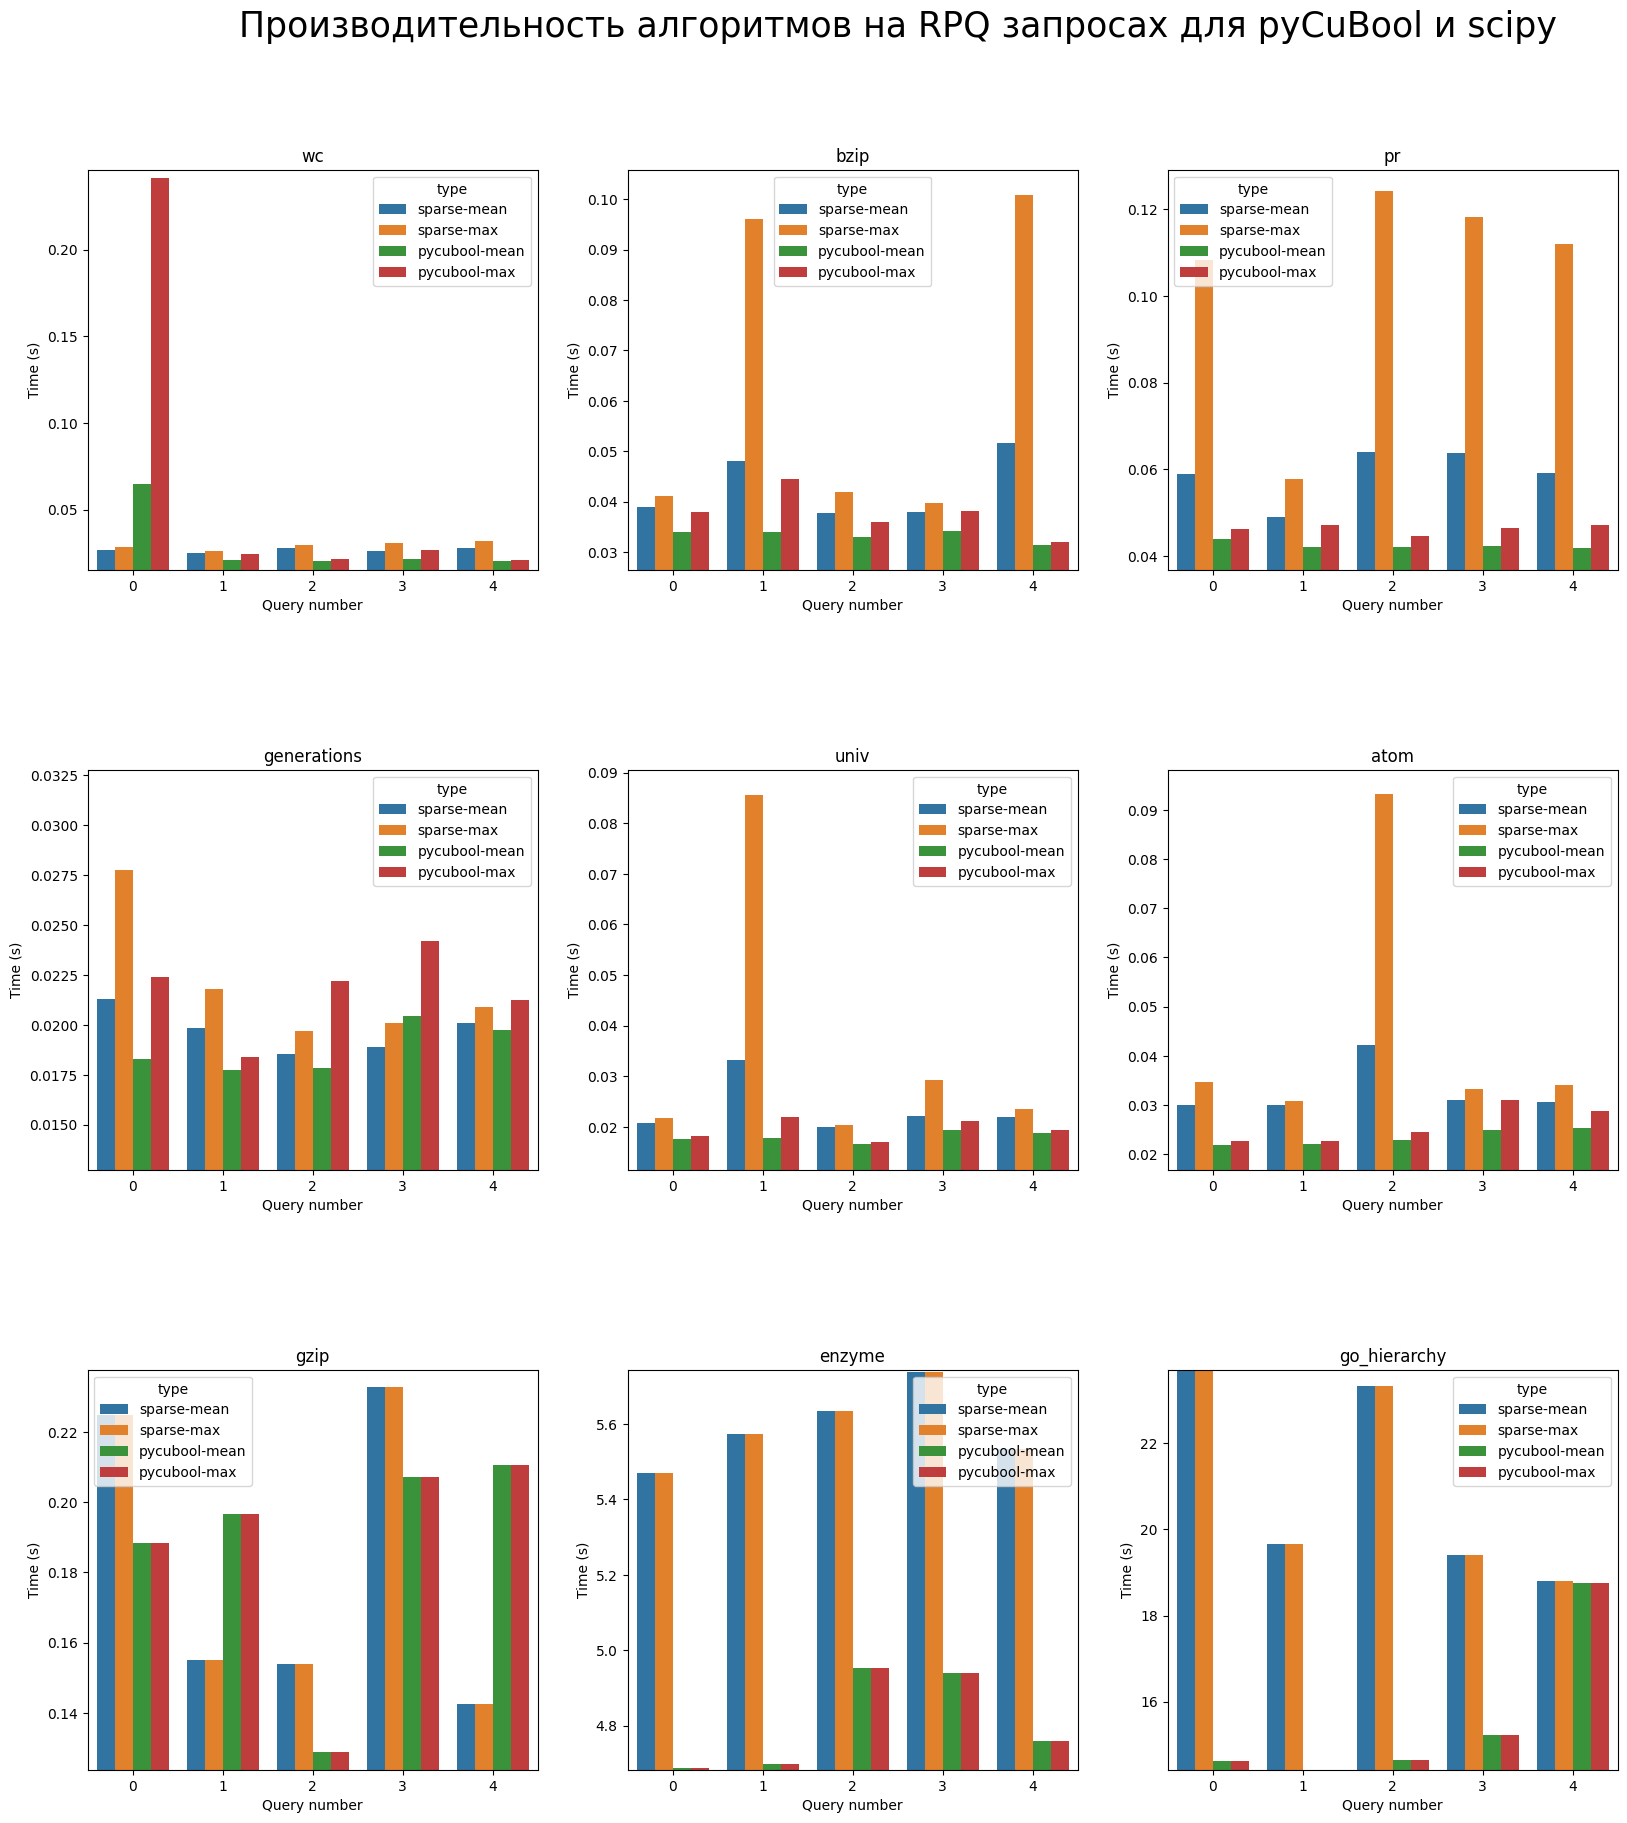

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

fig, axes = plt.subplots(3, 3, figsize=(18, 20))
fig.subplots_adjust(left=0.05, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.5)
fig.suptitle(
    "Производительность алгоритмов на RPQ запросах для pyCuBool и scipy", fontsize=25
)

for i, graph_name in enumerate(graph_names_list):
    res_mean_sparse = df_rpq_mean_fix_size[graph_name]
    res_max_sparse = df_rpq_max_fix_size[graph_name]
    res_mean_pycubool = df_cb_rpq_mean_fix_size[graph_name]
    res_max_pycubool = df_cb_rpq_max_fix_size[graph_name]

    df_all = pd.DataFrame(
        pd.concat(
            [res_mean_sparse, res_max_sparse, res_mean_pycubool, res_max_pycubool],
            ignore_index=True,
        )
    )
    df_all["type"] = pd.Series(
        ["sparse-mean"] * reg_count
        + ["sparse-max"] * reg_count
        + ["pycubool-mean"] * reg_count
        + ["pycubool-max"] * reg_count
    )

    ax = sns.barplot(
        ax=axes[i // 3, i % 3],
        data=df_all,
        x=df_all.index % reg_count,
        y=graph_name,
        hue="type",
    )

    delta = 0.005

    curr_min = df_all[graph_name].min() - delta
    curr_max = df_all[graph_name].max() + delta
    ax.set(
        title=graph_name,
        ylabel="Time (s)",
        xlabel="Query number",
        ylim=(curr_min, curr_max),
    )

plt.show()


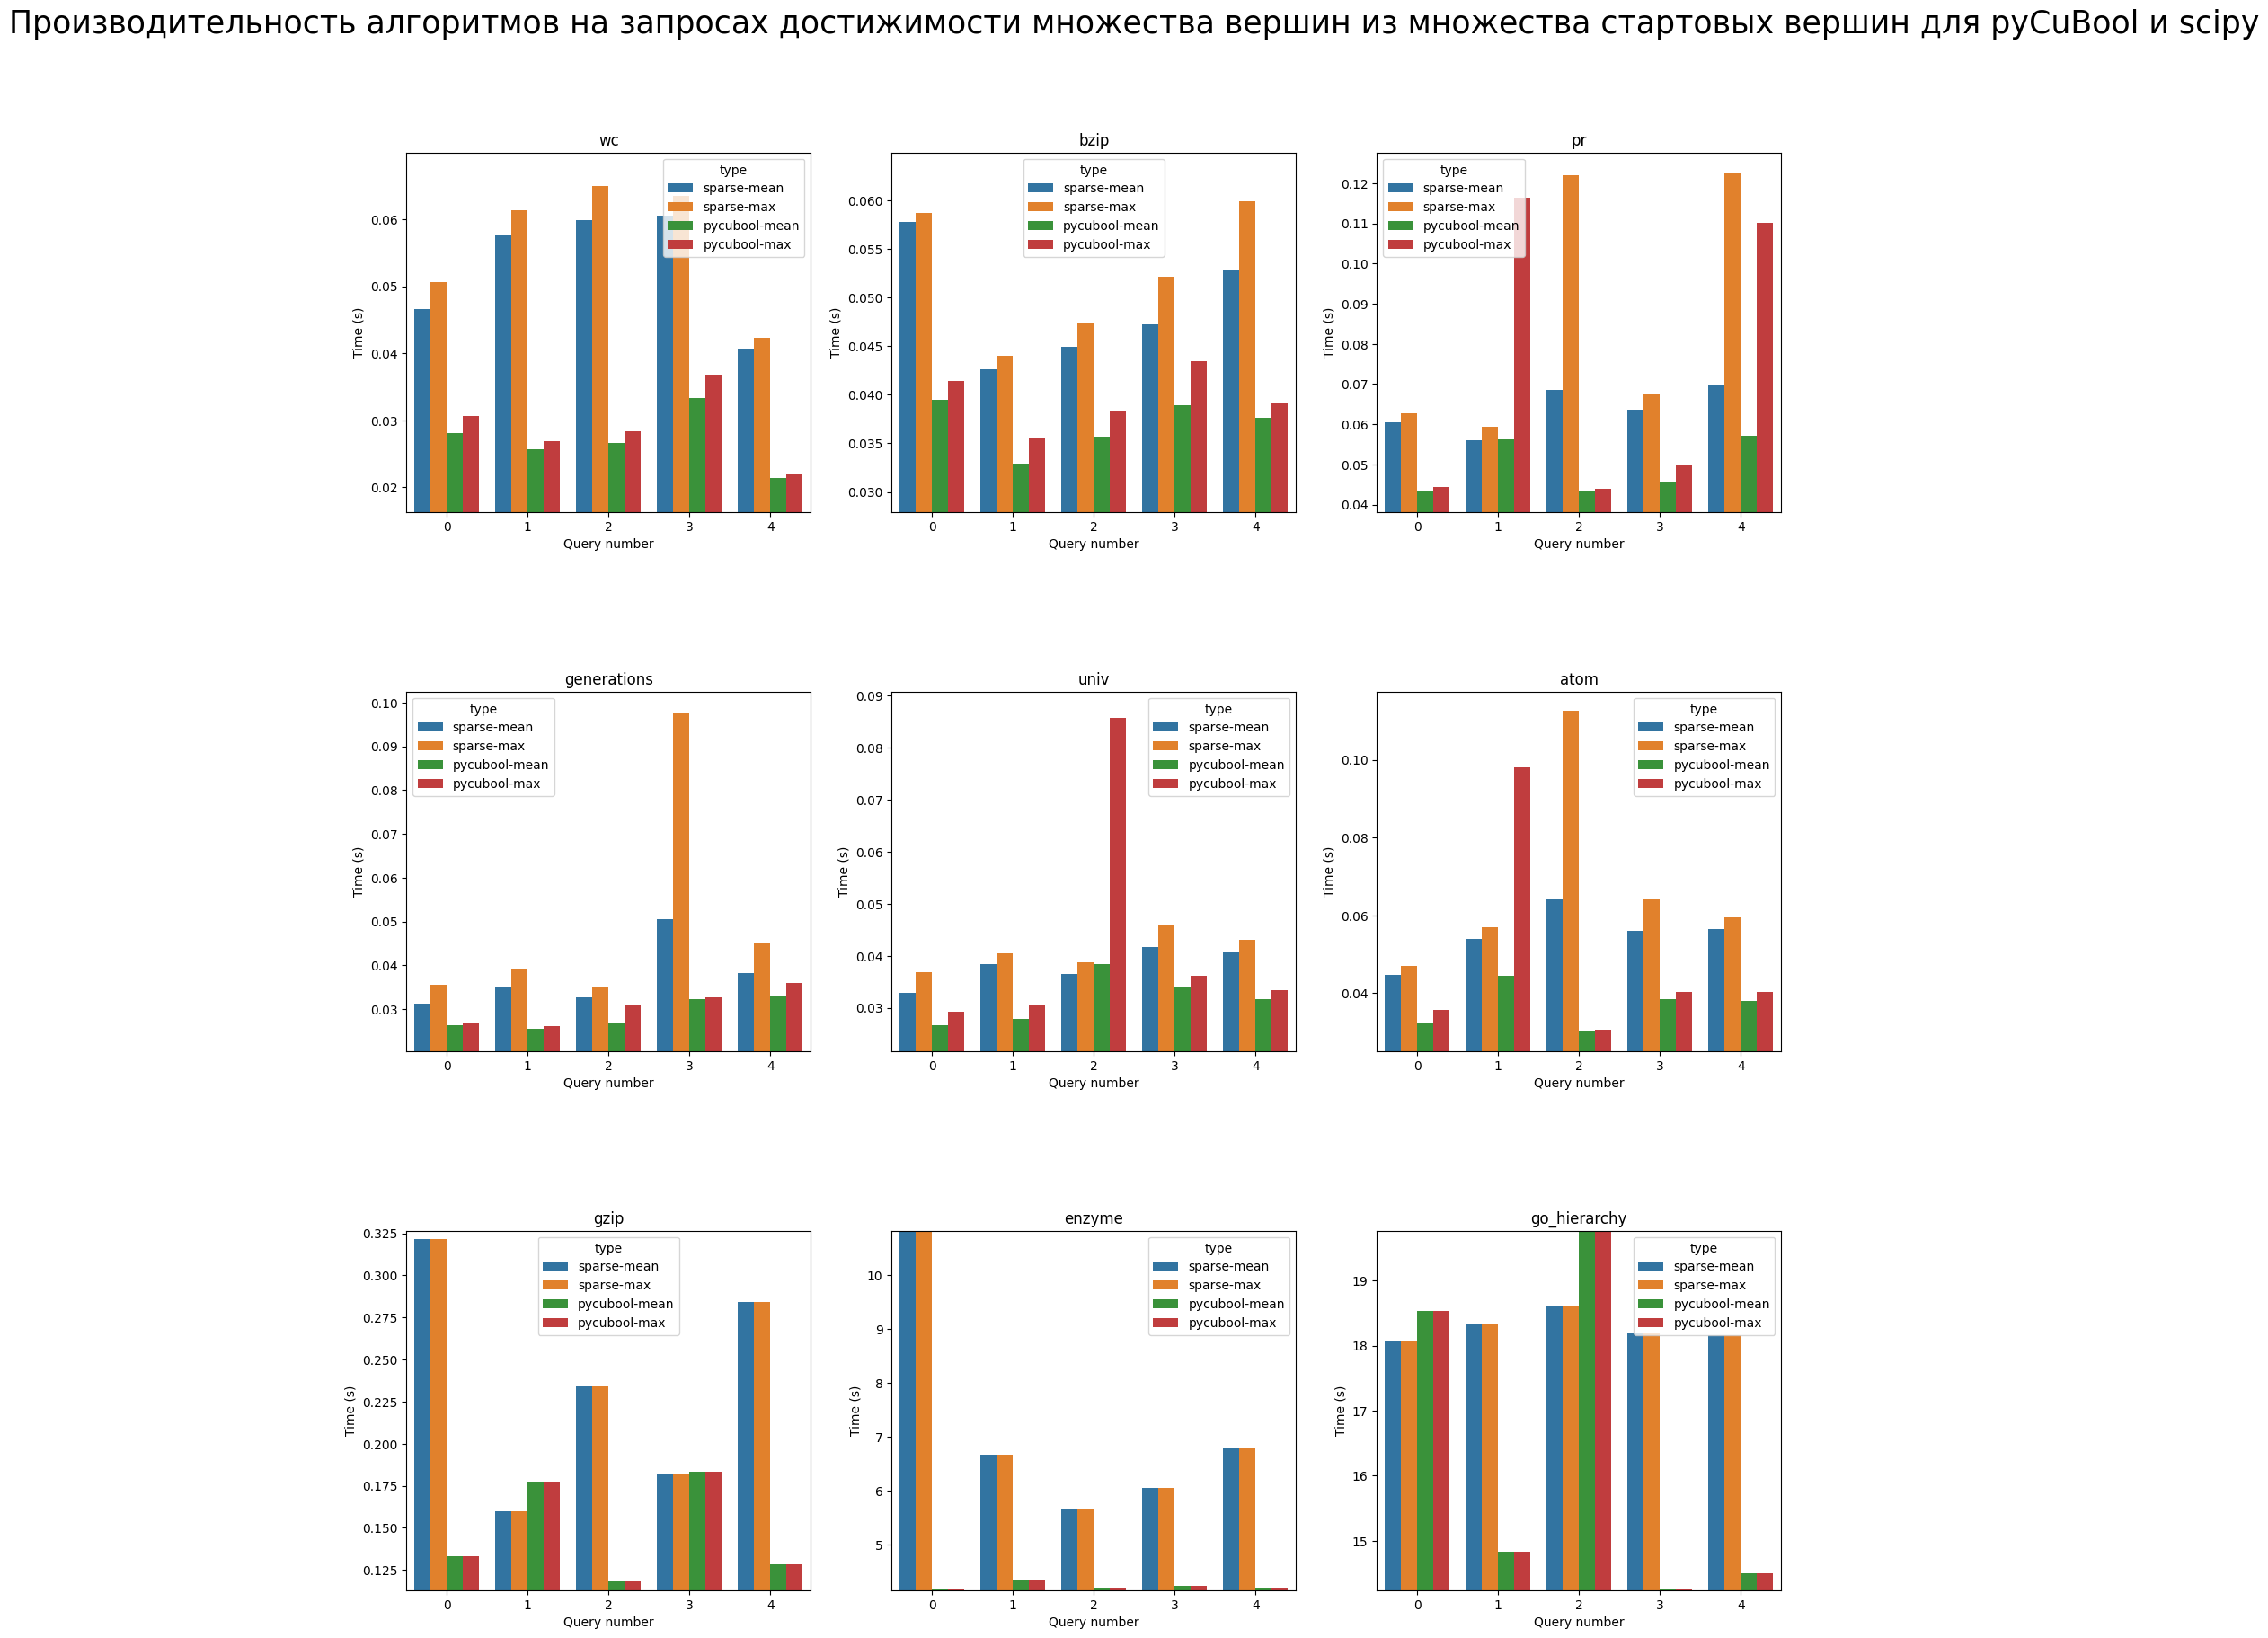

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

fig, axes = plt.subplots(3, 3, figsize=(18, 20))
fig.subplots_adjust(left=0.05, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.5)
fig.suptitle(
    "Производительность алгоритмов на запросах достижимости множества вершин из множества стартовых вершин для pyCuBool и scipy",
    fontsize=25,
)

for i, graph_name in enumerate(graph_names_list):
    res_mean_sparse = df_bfs_rpq_mean_fix_size[graph_name]
    res_max_sparse = df_bfs_rpq_max_fix_size[graph_name]
    res_mean_pycubool = df_cb_bfs_rpq_mean_fix_size[graph_name]
    res_max_pycubool = df_cb_bfs_rpq_max_fix_size[graph_name]

    df_all = pd.DataFrame(
        pd.concat(
            [res_mean_sparse, res_max_sparse, res_mean_pycubool, res_max_pycubool],
            ignore_index=True,
        )
    )
    df_all["type"] = pd.Series(
        ["sparse-mean"] * reg_count
        + ["sparse-max"] * reg_count
        + ["pycubool-mean"] * reg_count
        + ["pycubool-max"] * reg_count
    )

    ax = sns.barplot(
        ax=axes[i // 3, i % 3],
        data=df_all,
        x=df_all.index % reg_count,
        y=graph_name,
        hue="type",
    )

    delta = 0.005

    curr_min = df_all[graph_name].min() - delta
    curr_max = df_all[graph_name].max() + delta
    ax.set(
        title=graph_name,
        ylabel="Time (s)",
        xlabel="Query number",
        ylim=(curr_min, curr_max),
    )

plt.show()


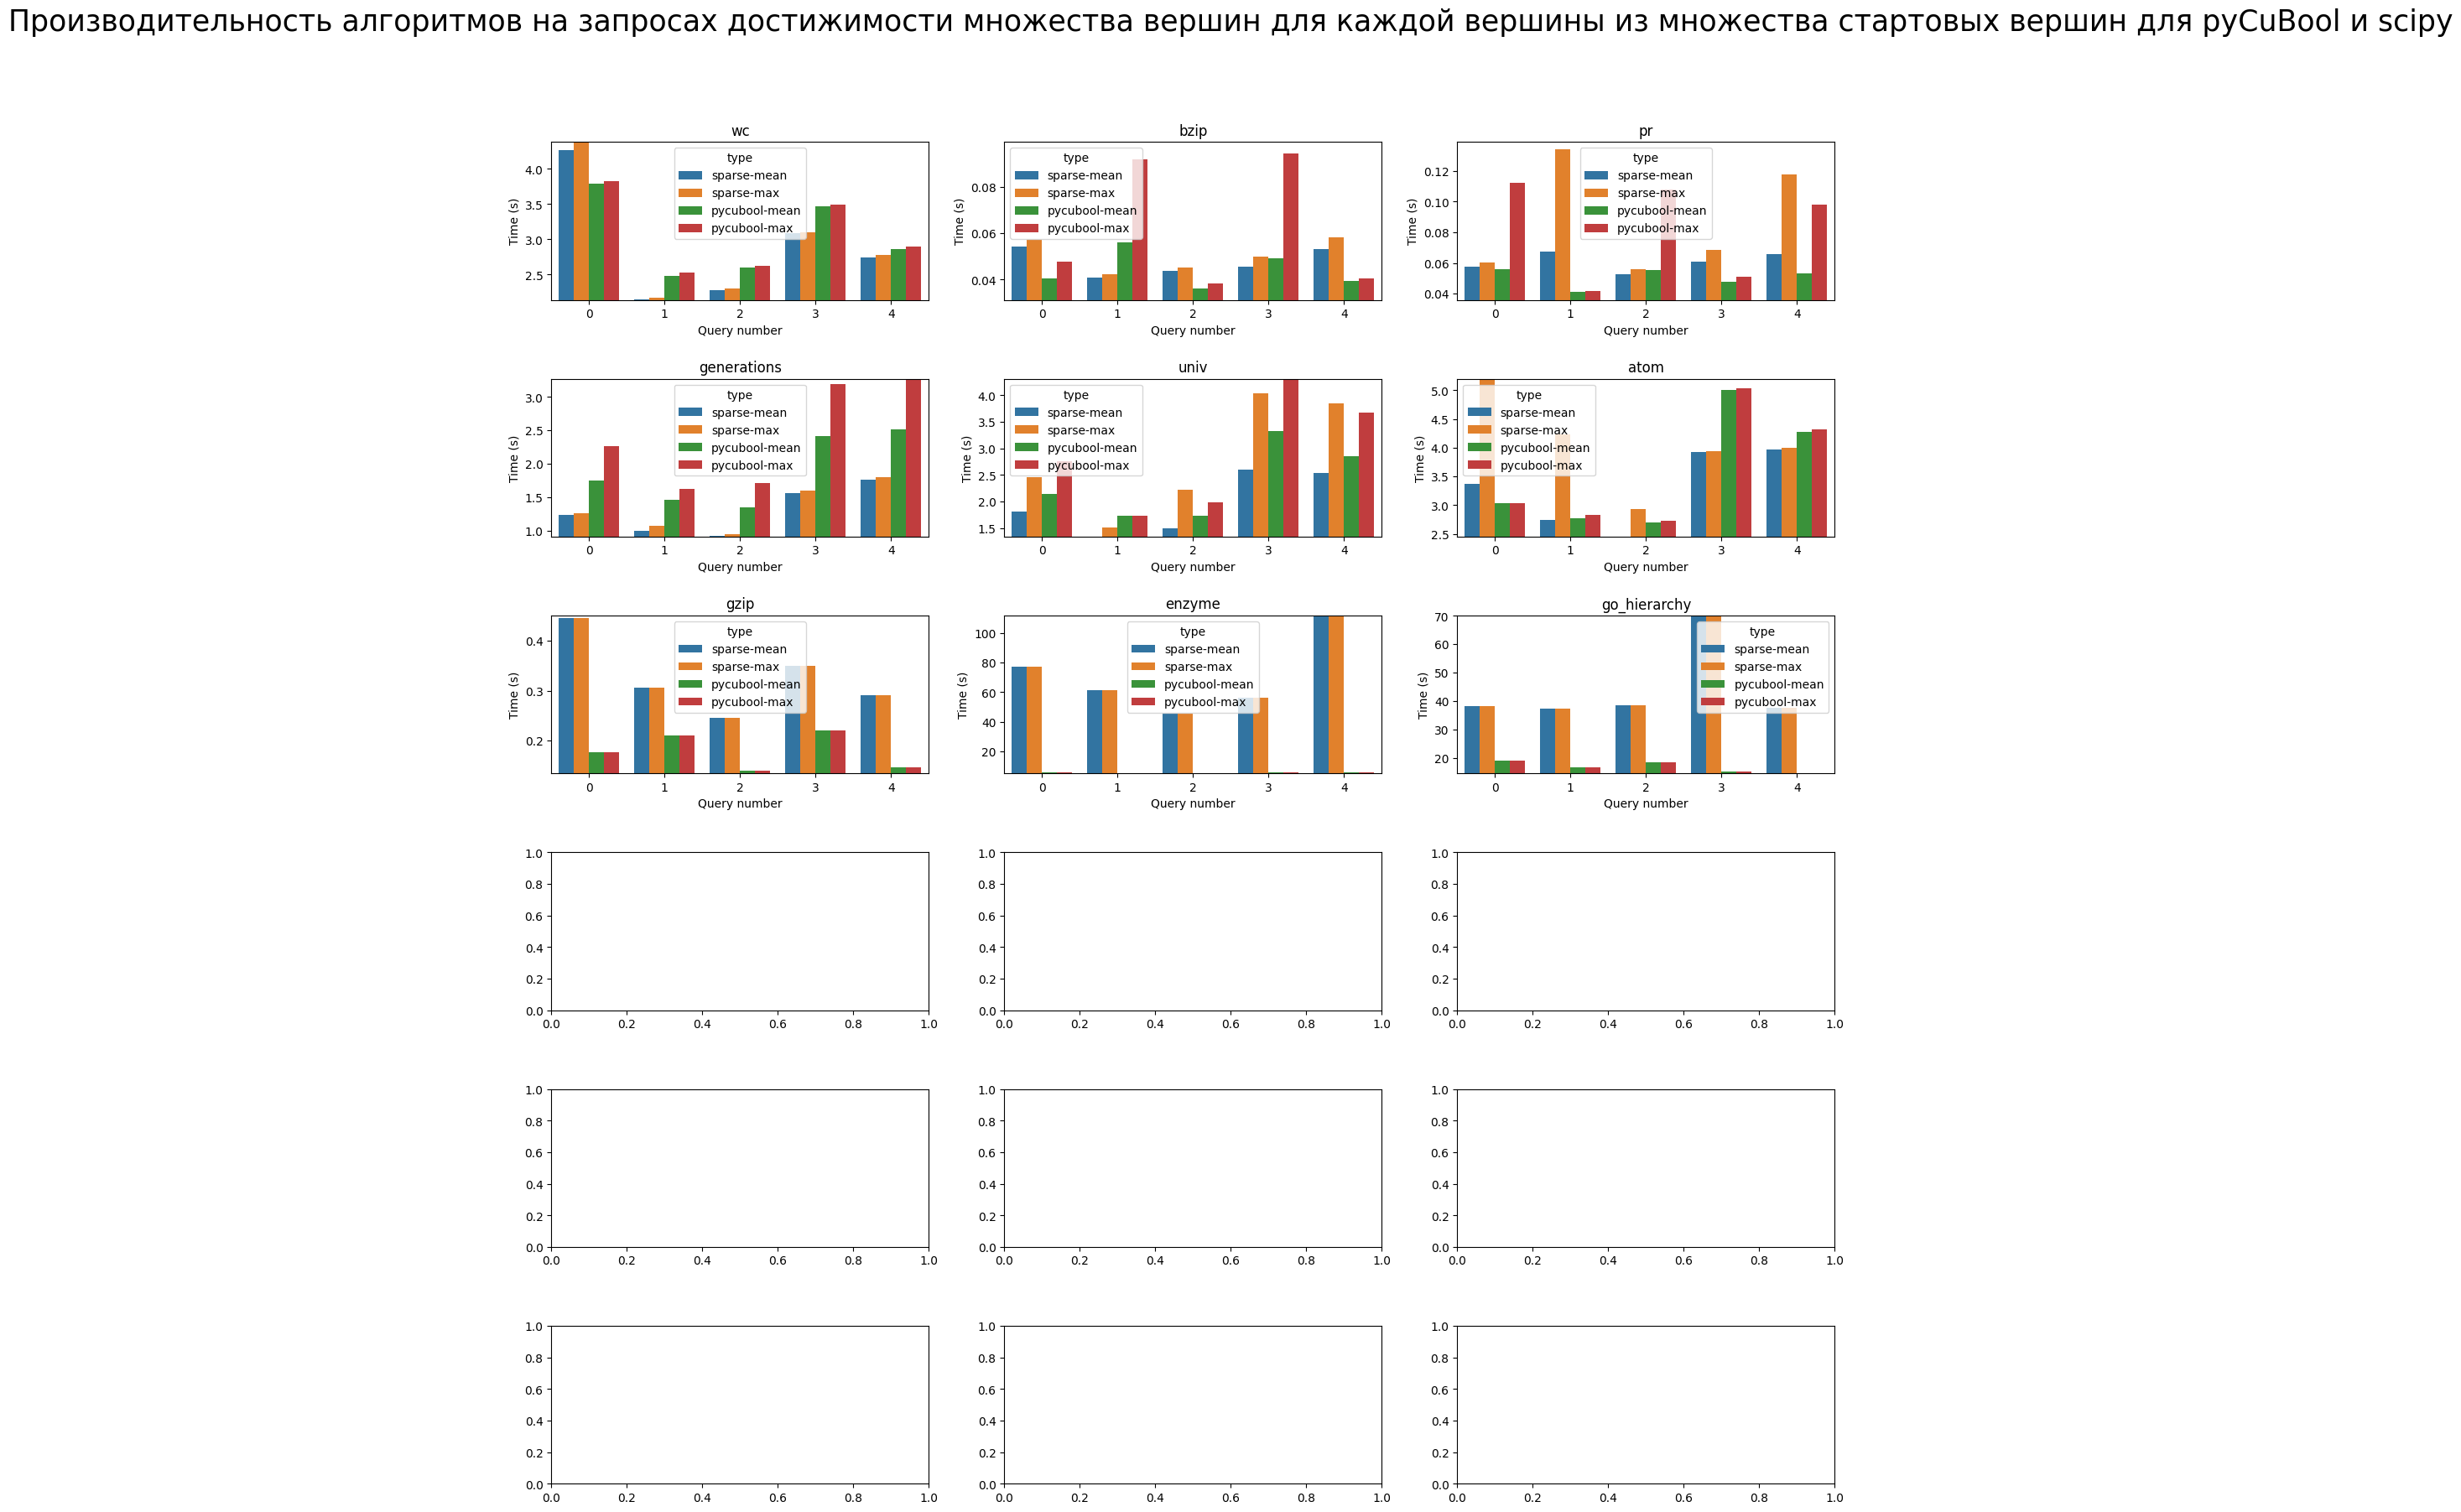

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

fig, axes = plt.subplots(6, 3, figsize=(18, 20))
fig.subplots_adjust(left=0.05, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.5)
fig.suptitle(
    "Производительность алгоритмов на запросах достижимости множества вершин "
    "для каждой вершины из множества стартовых вершин для pyCuBool и scipy",
    fontsize=25,
)

for i, graph_name in enumerate(graph_names_list):
    res_mean_sparse = df_bfs_sep_rpq_mean_fix_size[graph_name]
    res_max_sparse = df_bfs_sep_rpq_max_fix_size[graph_name]
    res_mean_pycubool = df_cb_bfs_sep_rpq_mean_fix_size[graph_name]
    res_max_pycubool = df_cb_bfs_sep_rpq_max_fix_size[graph_name]

    df_all = pd.DataFrame(
        pd.concat(
            [res_mean_sparse, res_max_sparse, res_mean_pycubool, res_max_pycubool],
            ignore_index=True,
        )
    )
    df_all["type"] = pd.Series(
        ["sparse-mean"] * reg_count
        + ["sparse-max"] * reg_count
        + ["pycubool-mean"] * reg_count
        + ["pycubool-max"] * reg_count
    )

    ax = sns.barplot(
        ax=axes[i // 3, i % 3],
        data=df_all,
        x=df_all.index % reg_count,
        y=graph_name,
        hue="type",
    )

    delta = 0.005

    curr_min = df_all[graph_name].min() - delta
    curr_max = df_all[graph_name].max() + delta
    ax.set(
        title=graph_name,
        ylabel="Time (s)",
        xlabel="Query number",
        ylim=(curr_min, curr_max),
    )

plt.show()


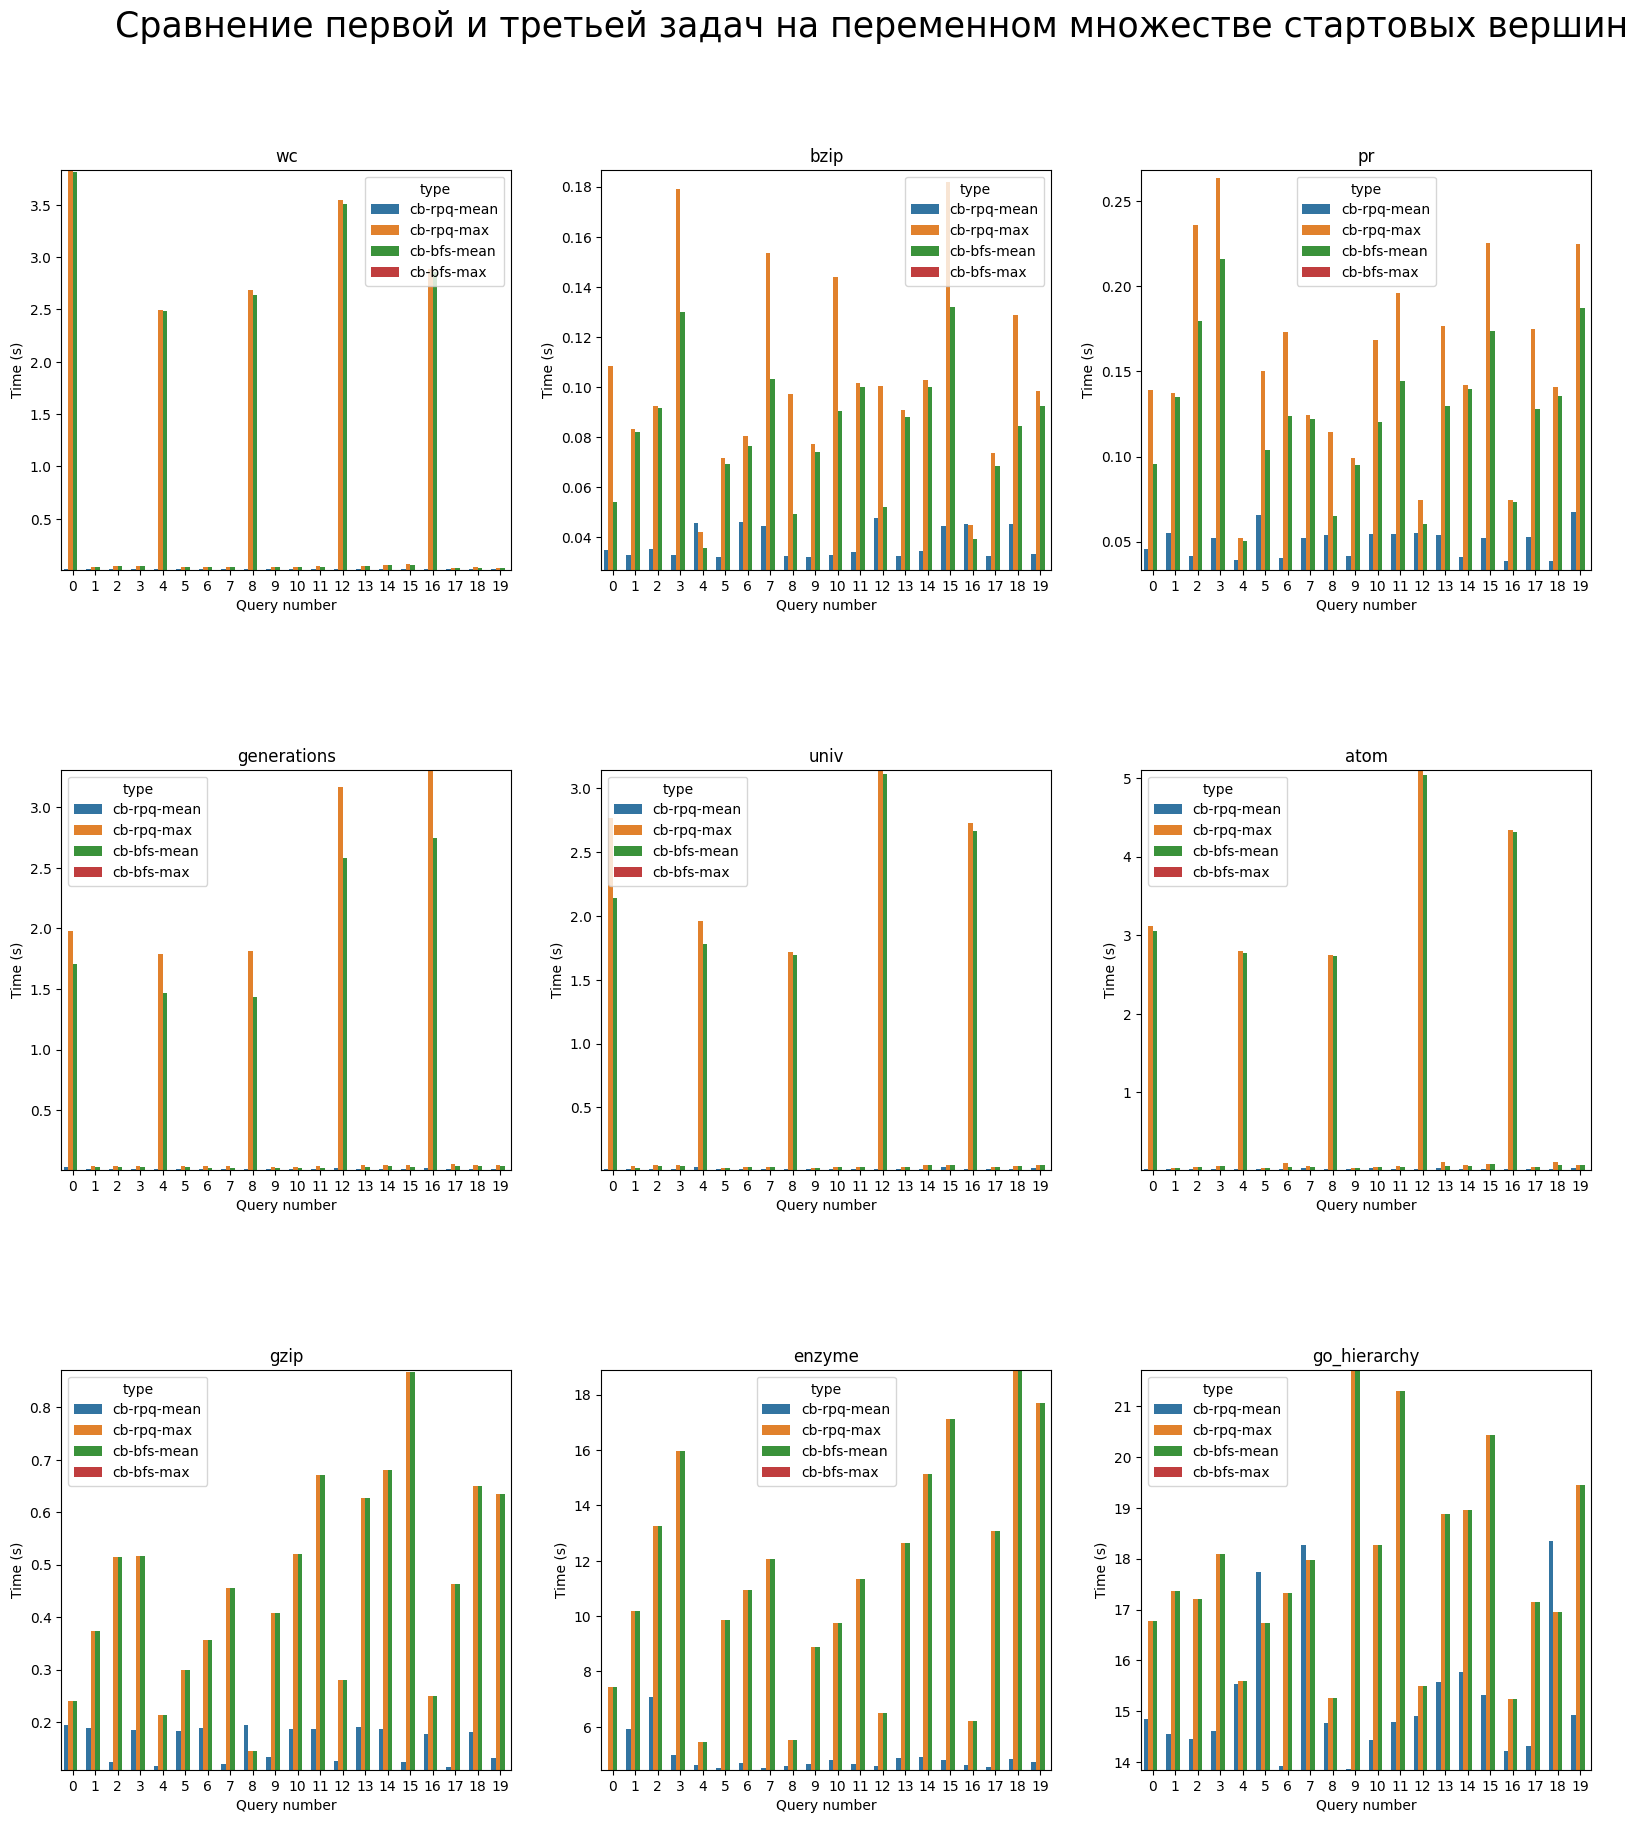

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

fig, axes = plt.subplots(3, 3, figsize=(18, 20))
fig.subplots_adjust(left=0.05, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.5)
fig.suptitle(
    "Сравнение первой и третьей задач на переменном множестве стартовых вершин",
    fontsize=25,
)

for i, graph_name in enumerate(graph_names_list):
    rpq_mean_pycubool = df_cb_rpq_mean[graph_name]
    rpq_max_pycubool = df_cb_rpq_max[graph_name]
    bfs_mean_pycubool = df_cb_bfs_sep_rpq_mean[graph_name]
    bfs_max_pycubool = df_cb_bfs_sep_rpq_max[graph_name]

    df_all = pd.DataFrame(
        pd.concat(
            [rpq_mean_pycubool, rpq_max_pycubool, bfs_mean_pycubool, bfs_max_pycubool],
            ignore_index=True,
        )
    )
    df_all["type"] = pd.Series(
        ["cb-rpq-mean"] * reg_count * size_count
        + ["cb-rpq-max"] * reg_count * size_count
        + ["cb-bfs-mean"] * reg_count * size_count
        + ["cb-bfs-max"] * reg_count * size_count
    )

    ax = sns.barplot(
        ax=axes[i // 3, i % 3],
        data=df_all,
        x=df_all.index % (reg_count * size_count),
        y=graph_name,
        hue="type",
    )

    delta = 0.005

    curr_min = df_all[graph_name].min() - delta
    curr_max = df_all[graph_name].max() + delta
    ax.set(
        title=graph_name,
        ylabel="Time (s)",
        xlabel="Query number",
        ylim=(curr_min, curr_max),
    )

plt.show()


## Заключение

- Первый вопрос: как видно из графиков, использование специализированных библиотек правтически всегда даёт выигрышь по скорости. Разница в скоростях растёт с увеличением ключевых характеристик графа.
- Второй вопрос: как видно на графиках, при выбранных параметрах для тестов, практически всегда выгоднее решать задачу нахождения всех пар вершин и выбирать среди них нужные. Однако при значительном уменьшении количества стартовых вершин алгоритм с поиском пути из каждой отдельной стартовой вершины.
- Третий вопрос: решение задачи $RPQ_{BFS}$ для нахождения путей из множества стартовых вершин во множество финальных, оказалось быстрее решения задачи $RPQ_{BFS}$ для поиска путей из каждой отдельной стартовой вершины во множество финальных, пропорционально количеству стартовых вершин.